Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
###
### Input delta in folder :  /data
configs = {"analytics_date":"2020-11-18"}
anltdate="2020-11-18"
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [3]:
#sc.stop()

#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [4]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
configs = {"analytics_date":"2020-11-18"}
anltdate="2020-11-18"
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [5]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [6]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-11-18  Afghanistan_nan         0         225.0         593.0   
1  2020-11-18      Albania_nan         0         694.0        1893.0   
2  2020-11-18      Algeria_nan         0        1002.0        2772.0   
3  2020-11-18      Andorra_nan         0          37.0         226.0   
4  2020-11-18       Angola_nan         0         203.0         444.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1165.0              43628.0               43756.0  35530000.0   
1        3832.0              29126.0               29576.0   2878445.0   
2        6145.0              69591.0               70368.0  41320000.0   
3         474.0               5951.0                6035.0     77239.0   
4        1002.0              13818.0               13921.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001228   
1                                       0.010119   
2                                       0.001684   
3                                       0.077059   
4                                       0.000420   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.012279                    128.0   
1                                           0.101190                    450.0   
2                                           0.016842                    777.0   
3                                           0.770585                     84.0   
4                                           0.004205                    103.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    3.602589             166.428574   
1                  156.334412             547.428589   
2                   18.804453             877.857117   
3                 1087.533447              67.714287   
4                    3.133912             143.142853   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           6.557838      
1                                         266.254883      
2                                          29.743465      
3                                        1227.359253      
4                                           6.097436

In [7]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +80 cases a day AVG last 7days 

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-18' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-18           United States_nan          157318.281250   
1   2020-11-18                   Italy_nan           34658.429688   
2   2020-11-18                  Brazil_nan           30393.285156   
3   2020-11-18                  France_nan           29458.285156   
4   2020-11-18          United Kingdom_nan           25279.572266   
5   2020-11-18                  Poland_nan           22764.000000   
6   2020-11-18                  Russia_nan           21735.714844   
7   2020-11-18                   Spain_nan           18400.714844   
8   2020-11-18                 Germany_nan           18294.857422   
9   2020-11-18                    Iran_nan           12169.286133   
10  2020-11-18                 Ukraine_nan           11459.142578   
11  2020-11-18               Argentina_nan            9504.142578   
12  2020-11-18                 Romania_nan            8454.142578   
13  2020-11-18                Colombia_nan            7967.428711   
14  2020-11-18                 Austria_nan            7104.428711   
15  2020-11-18                Portugal_nan            6126.714355   
16  2020-11-18                 Czechia_nan            5698.428711   
17  2020-11-18             Switzerland_nan            5618.856934   
18  2020-11-18             Netherlands_nan            5370.143066   
19  2020-11-18                 Morocco_nan            5205.571289   
20  2020-11-18                  Jordan_nan            5001.571289   
21  2020-11-18                 Hungary_nan            4820.143066   
22  2020-11-18                 Belgium_nan            4732.856934   
23  2020-11-18                  Sweden_nan            4314.143066   
24  2020-11-18                  Serbia_nan            3641.000000   
25  2020-11-18                Bulgaria_nan            3318.857178   
26  2020-11-18                 Georgia_nan            3186.000000   
27  2020-11-18                    Iraq_nan            2741.857178   
28  2020-11-18                  Greece_nan            2607.857178   
29  2020-11-18                 Croatia_nan            2460.142822   
30  2020-11-18                    Peru_nan            2105.857178   
31  2020-11-18              Azerbaijan_nan            1680.857178   
32  2020-11-18                Slovakia_nan            1639.857178   
33  2020-11-18                 Lebanon_nan            1578.000000   
34  2020-11-18                Slovenia_nan            1460.000000   
35  2020-11-18                 Armenia_nan            1454.714233   
36  2020-11-18               Lithuania_nan            1433.571411   
37  2020-11-18              Canada_Ontario            1426.714233   
38  2020-11-18                   Chile_nan            1386.142822   
39  2020-11-18  Bosnia and Herzegovina_nan            1274.285767   
40  2020-11-18               Canada_Quebec            1271.857178   
41  2020-11-18                 Tunisia_nan            1247.142822   
42  2020-11-18    United Arab Emirates_nan            1203.428589   
43  2020-11-18                 Belarus_nan            1199.857178   
44  2020-11-18                 Denmark_nan            1084.714233   
45  2020-11-18                  Panama_nan            1059.857178   
46  2020-11-18         North Macedonia_nan            1055.857178   
47  2020-11-18                 Moldova_nan            1045.714233   
48  2020-11-18              Costa Rica_nan            1003.428589   
49  2020-11-18              Canada_Alberta             869.857117   
50  2020-11-18      West Bank and Gaza_nan             787.571411   
51  2020-11-18                   Libya_nan             703.714294   
52  2020-11-18                  Israel_nan             696.571411   
53  2020-11-18                  Kuwait_nan             643.428589   
54  2020-11-18     Canada_British Columbia             631.857117   
55  2020-11-18                  Kosovo_nan             631.000000   
56  2020-11-18                Paraguay_nan             622.857117   
57  2020

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-18' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-11-18           United States_nan          157318.281250   
1   2020-11-18                   Italy_nan           34658.429688   
2   2020-11-18                  Brazil_nan           30393.285156   
3   2020-11-18                  France_nan           29458.285156   
4   2020-11-18          United Kingdom_nan           25279.572266   
5   2020-11-18                  Poland_nan           22764.000000   
6   2020-11-18                  Russia_nan           21735.714844   
7   2020-11-18                   Spain_nan           18400.714844   
8   2020-11-18                 Germany_nan           18294.857422   
9   2020-11-18                    Iran_nan           12169.286133   
10  2020-11-18                 Ukraine_nan           11459.142578   
11  2020-11-18               Argentina_nan            9504.142578   
12  2020-11-18                 Romania_nan            8454.142578   
13  2020-11-18                Colombia_nan            7967.428711   
14  2020-11-18                 Austria_nan            7104.428711   
15  2020-11-18                Portugal_nan            6126.714355   
16  2020-11-18                 Czechia_nan            5698.428711   
17  2020-11-18             Switzerland_nan            5618.856934   
18  2020-11-18             Netherlands_nan            5370.143066   
19  2020-11-18                 Morocco_nan            5205.571289   
20  2020-11-18                  Jordan_nan            5001.571289   
21  2020-11-18                 Hungary_nan            4820.143066   
22  2020-11-18                 Belgium_nan            4732.856934   
23  2020-11-18                  Sweden_nan            4314.143066   
24  2020-11-18                  Serbia_nan            3641.000000   
25  2020-11-18                Bulgaria_nan            3318.857178   
26  2020-11-18                 Georgia_nan            3186.000000   
27  2020-11-18                    Iraq_nan            2741.857178   
28  2020-11-18                  Greece_nan            2607.857178   
29  2020-11-18                 Croatia_nan            2460.142822   
..         ...                         ...                    ...   
37  2020-11-18              Canada_Ontario            1426.714233   
38  2020-11-18                   Chile_nan            1386.142822   
39  2020-11-18  Bosnia and Herzegovina_nan            1274.285767   
40  2020-11-18               Canada_Quebec            1271.857178   
41  2020-11-18                 Tunisia_nan            1247.142822   
42  2020-11-18    United Arab Emirates_nan            1203.428589   
43  2020-11-18                 Belarus_nan            1199.857178   
44  2020-11-18                 Denmark_nan            1084.714233   
45  2020-11-18                  Panama_nan            1059.857178   
46  2020-11-18         North Macedonia_nan            1055.857178   
47  2020-11-18                 Moldova_nan            1045.714233   
48  2020-11-18              Costa Rica_nan            1003.428589   
49  2020-11-18              Canada_Alberta             869.857117   
50  2020-11-18      West Bank and Gaza_nan             787.571411   
51  2020-11-18                   Libya_nan             703.714294   
52  2020-11-18                  Israel_nan             696.571411   
53  2020-11-18                  Kuwait_nan             643.428589   
54  2020-11-18     Canada_British Columbia             631.857117   
55  2020-11-18                  Kosovo_nan             631.000000   
56  2020-11-18                Paraguay_nan             622.857117   
57  2020-11-18              Montenegro_nan             605.428589   
58  2020-11-18                  Norway_nan             603.857117   
59  2020-11-18              Luxembourg_nan             567.285706   
60  2020-11-18                 Albania_nan             547.428589   
61  2020-11-18              Kyrgyzstan_nan             444.142853   
62  2020-11-18                 Ireland_nan             399.571442   
63  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-18' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-11-18           United States_nan          157318.281250   
1   2020-11-18                   Italy_nan           34658.429688   
2   2020-11-18                  France_nan           29458.285156   
3   2020-11-18          United Kingdom_nan           25279.572266   
4   2020-11-18                  Poland_nan           22764.000000   
5   2020-11-18                   Spain_nan           18400.714844   
6   2020-11-18                 Germany_nan           18294.857422   
7   2020-11-18                 Ukraine_nan           11459.142578   
8   2020-11-18               Argentina_nan            9504.142578   
9   2020-11-18                 Romania_nan            8454.142578   
10  2020-11-18                 Austria_nan            7104.428711   
11  2020-11-18                Portugal_nan            6126.714355   
12  2020-11-18                 Czechia_nan            5698.428711   
13  2020-11-18             Switzerland_nan            5618.856934   
14  2020-11-18             Netherlands_nan            5370.143066   
15  2020-11-18                  Jordan_nan            5001.571289   
16  2020-11-18                 Hungary_nan            4820.143066   
17  2020-11-18                 Belgium_nan            4732.856934   
18  2020-11-18                  Sweden_nan            4314.143066   
19  2020-11-18                  Serbia_nan            3641.000000   
20  2020-11-18                Bulgaria_nan            3318.857178   
21  2020-11-18                 Georgia_nan            3186.000000   
22  2020-11-18                  Greece_nan            2607.857178   
23  2020-11-18                 Croatia_nan            2460.142822   
24  2020-11-18                Slovakia_nan            1639.857178   
25  2020-11-18                 Lebanon_nan            1578.000000   
26  2020-11-18                Slovenia_nan            1460.000000   
27  2020-11-18                 Armenia_nan            1454.714233   
28  2020-11-18               Lithuania_nan            1433.571411   
29  2020-11-18  Bosnia and Herzegovina_nan            1274.285767   
30  2020-11-18                 Denmark_nan            1084.714233   
31  2020-11-18                  Panama_nan            1059.857178   
32  2020-11-18         North Macedonia_nan            1055.857178   
33  2020-11-18                 Moldova_nan            1045.714233   
34  2020-11-18              Costa Rica_nan            1003.428589   
35  2020-11-18              Canada_Alberta             869.857117   
36  2020-11-18      West Bank and Gaza_nan             787.571411   
37  2020-11-18                  Kosovo_nan             631.000000   
38  2020-11-18              Montenegro_nan             605.428589   
39  2020-11-18              Luxembourg_nan             567.285706   
40  2020-11-18                 Albania_nan             547.428589   
41  2020-11-18             Canada_Manitoba             390.000000   
42  2020-11-18                  Latvia_nan             359.857147   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          665.389221          161934.0   
1                                          802.278442           32191.0   
2                                          589.249878           45498.0   
3                                          532.682129           20051.0   
4                                          839.115295           19152.0   
5                                          552.100281           13159.0   
6                                          309.370697           26231.0   
7                                          366.374512           12177.0   
8                                          294.984985           10621.0   
9                                          606.031738            8262.0   
10                                        1127.431396            5984.0   
11                                         833.566589            4452.0  

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-18' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-11-18                Brazil_nan           30393.285156   
1   2020-11-18                Russia_nan           21735.714844   
2   2020-11-18                  Iran_nan           12169.286133   
3   2020-11-18              Colombia_nan            7967.428711   
4   2020-11-18               Morocco_nan            5205.571289   
5   2020-11-18            Azerbaijan_nan            1680.857178   
6   2020-11-18            Canada_Ontario            1426.714233   
7   2020-11-18             Canada_Quebec            1271.857178   
8   2020-11-18               Tunisia_nan            1247.142822   
9   2020-11-18  United Arab Emirates_nan            1203.428589   
10  2020-11-18               Belarus_nan            1199.857178   
11  2020-11-18                 Libya_nan             703.714294   
12  2020-11-18                Kuwait_nan             643.428589   
13  2020-11-18   Canada_British Columbia             631.857117   
14  2020-11-18              Paraguay_nan             622.857117   
15  2020-11-18                Norway_nan             603.857117   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          200.182541           35294.0   
1                                          210.588242           22201.0   
2                                          202.838333           13352.0   
3                                          219.722061            5911.0   
4                                          197.945908            5415.0   
5                                          232.539825            2075.0   
6                                          137.089905            1436.0   
7                                          209.852676             982.0   
8                                          148.066895             720.0   
9                                          179.234039            1255.0   
10                                         177.757095            1251.0   
11                                         143.379150             612.0   
12                                         217.742325             556.0   
13                                         173.450974             717.0   
14                                         122.615677             758.0   
15                                         157.812210            1680.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        62799.0      212753.0            5911758.0  212559008.0   
1        67076.0      152150.0            1954912.0  144500000.0   
2        38948.0       85185.0             788473.0   83993000.0   
3        19494.0       55772.0            1211128.0   50765952.0   
4        13393.0       36439.0             301604.0   36817128.0   
5         5729.0       11766.0              79158.0   10119557.0   
6         4250.0        9987.0             100214.0   14570000.0   
7         3411.0        8903.0             126054.0    8485000.0   
8         2384.0        8730.0              81723.0   11791968.0   
9         3674.0        8424.0             152809.0    9400000.0   
10        3829.0        8399.0             116699.0    9449974.0   
11        2308.0        4926.0              74936.0    6871292.0   
12        1544.0        4504.0             137885.0    4137000.0   
13        2676.0        4423.0              23662.0    5100000.0   
14        1792.0        4360.0              72857.0    7111652.0   
15        1680.0        4227.0              30114.0    5357000.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.278123           
1                                            0.135288           
2                                            0.093874           
3                                            0.238571           
4                                            0.081920           
5                                            0.

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-18' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date          region  delta_roling_7day_AVG  \
0  2020-11-18        Iraq_nan            2741.857178   
1  2020-11-18        Peru_nan            2105.857178   
2  2020-11-18       Chile_nan            1386.142822   
3  2020-11-18      Israel_nan             696.571411   
4  2020-11-18  Kyrgyzstan_nan             444.142853   
5  2020-11-18     Ireland_nan             399.571442   
6  2020-11-18       Qatar_nan             222.714279   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         100.303108            2961.0   
1                                          89.690788            1257.0   
2                                         101.703194            1006.0   
3                                         111.937561             782.0   
4                                          95.306778             486.0   
5                                         113.563538             330.0   
6                                         108.631424             194.0   

   3_day_change  7_day_change  confirmed_yesterday  population  \
0        7588.0       19193.0             524503.0  38270000.0   
1        5618.0       14741.0             938268.0  32870710.0   
2        3934.0        9703.0             533610.0  19081012.0   
3        2198.0        4876.0             325537.0   8712000.0   
4        1516.0        3109.0              67469.0   6524195.0   
5        1160.0        2797.0              68686.0   4925877.0   
6         652.0        1559.0             136222.0   2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.137054                   2762.0   
1                                           0.285442                   2533.0   
2                                           0.279655                   1643.0   
3                                           0.373666                    544.0   
4                                           0.103415                    611.0   
5                                           0.139441                    404.0   
6                                           0.474602                    236.0   

   delta_new_cases_per_1M_hab  
0                   72.171417  
1                   77.059486  
2                   86.106537  
3                   62.442608  
4                   93.651398  
5                   82.015854  
6                   82.222633

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-18' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-18             Afghanistan_nan             166.428574   
1   2020-11-18                 Nigeria_nan             160.142853   
2   2020-11-18                   Ghana_nan             153.428574   
3   2020-11-18                  Angola_nan             143.142853   
4   2020-11-18                   Sudan_nan             127.428574   
5   2020-11-18                 Bolivia_nan             115.571426   
6   2020-11-18              Mozambique_nan              96.285713   
7   2020-11-18                 Uruguay_nan              84.000000   
8   2020-11-18                Cameroon_nan              67.857140   
9   2020-11-18                Zimbabwe_nan              47.857143   
10  2020-11-18                    Cuba_nan              39.285713   
11  2020-11-18           Cote d'Ivoire_nan              22.428572   
12  2020-11-18                 Iceland_nan              14.428572   
13  2020-11-18             China_Hong Kong              11.571428   
14  2020-11-18                   Niger_nan              10.142858   
15  2020-11-18            Burkina Faso_nan              10.000000   
16  2020-11-18               Nicaragua_nan               9.142858   
17  2020-11-18                 Vietnam_nan               8.857142   
18  2020-11-18               Singapore_nan               8.142858   
19  2020-11-18   Australia_New South Wales               5.714286   
20  2020-11-18   Australia_South Australia               4.857143   
21  2020-11-18                Thailand_nan               4.714286   
22  2020-11-18                 Taiwan*_nan               3.571429   
23  2020-11-18              China_Shanghai               3.000000   
24  2020-11-18             New Zealand_nan               2.857143   
25  2020-11-18             China_Guangdong               2.428571   
26  2020-11-18               China_Sichuan               2.000000   
27  2020-11-18        Australia_Queensland               1.142857   
28  2020-11-18               China_Tianjin               1.142857   
29  2020-11-18               China_Shaanxi               1.000000   
30  2020-11-18  United Kingdom_Isle of Man               0.714286   
31  2020-11-18                Cambodia_nan               0.571429   
32  2020-11-18              China_Liaoning               0.428571   
33  2020-11-18                China_Yunnan               0.428571   
34  2020-11-18                China_Fujian               0.285714   
35  2020-11-18                 China_Henan               0.285714   
36  2020-11-18        China_Inner Mongolia               0.285714   
37  2020-11-18                China_Shanxi               0.285714   
38  2020-11-18                 China_Gansu               0.142857   
39  2020-11-18                 China_Hubei               0.142857   
40  2020-11-18               China_Jiangsu               0.142857   
41  2020-11-18              China_Shandong               0.142857   
42  2020-11-18          Australia_Victoria               0.000000   
43  2020-11-18                 China_Anhui               0.000000   
44  2020-11-18               China_Beijing               0.000000   
45  2020-11-18             China_Chongqing               0.000000   
46  2020-11-18               China_Guangxi               0.000000   
47  2020-11-18               China_Guizhou               0.000000   
48  2020-11-18                China_Hainan               0.000000   
49  2020-11-18                 China_Hebei               0.000000   
50  2020-11-18          China_Heilongjiang               0.000000   
51  2020-11-18                 China_Hunan               0.000000   
52  2020-11-18               China_Jiangxi               0.000000   
53  2020-11-18                 China_Jilin               0.000000   
54  2020-11-18                 China_Macau               0.000000   
55  2020-11-18               China_Ningxia               0.000000   
56  2020-11-18               China_Qinghai               0.000000   
57  2020

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-18' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                     region  delta_roling_7day_AVG  \
0   2020-11-18            Afghanistan_nan             166.428574   
1   2020-11-18                Nigeria_nan             160.142853   
2   2020-11-18                  Ghana_nan             153.428574   
3   2020-11-18                 Angola_nan             143.142853   
4   2020-11-18                  Sudan_nan             127.428574   
5   2020-11-18                Bolivia_nan             115.571426   
6   2020-11-18             Mozambique_nan              96.285713   
7   2020-11-18                Uruguay_nan              84.000000   
8   2020-11-18               Cameroon_nan              67.857140   
9   2020-11-18               Zimbabwe_nan              47.857143   
10  2020-11-18                   Cuba_nan              39.285713   
11  2020-11-18          Cote d'Ivoire_nan              22.428572   
12  2020-11-18                Iceland_nan              14.428572   
13  2020-11-18            China_Hong Kong              11.571428   
14  2020-11-18                  Niger_nan              10.142858   
15  2020-11-18           Burkina Faso_nan              10.000000   
16  2020-11-18              Nicaragua_nan               9.142858   
17  2020-11-18                Vietnam_nan               8.857142   
18  2020-11-18              Singapore_nan               8.142858   
19  2020-11-18  Australia_New South Wales               5.714286   
20  2020-11-18  Australia_South Australia               4.857143   
21  2020-11-18               Thailand_nan               4.714286   
22  2020-11-18                Taiwan*_nan               3.571429   
23  2020-11-18             China_Shanghai               3.000000   
24  2020-11-18            New Zealand_nan               2.857143   
25  2020-11-18            China_Guangdong               2.428571   
26  2020-11-18              China_Sichuan               2.000000   
27  2020-11-18       Australia_Queensland               1.142857   
28  2020-11-18              China_Tianjin               1.142857   
29  2020-11-18              China_Shaanxi               1.000000   
..         ...                        ...                    ...   
33  2020-11-18               China_Yunnan               0.428571   
34  2020-11-18               China_Fujian               0.285714   
35  2020-11-18                China_Henan               0.285714   
36  2020-11-18       China_Inner Mongolia               0.285714   
37  2020-11-18               China_Shanxi               0.285714   
38  2020-11-18                China_Gansu               0.142857   
39  2020-11-18                China_Hubei               0.142857   
40  2020-11-18              China_Jiangsu               0.142857   
41  2020-11-18             China_Shandong               0.142857   
42  2020-11-18         Australia_Victoria               0.000000   
43  2020-11-18                China_Anhui               0.000000   
44  2020-11-18              China_Beijing               0.000000   
45  2020-11-18            China_Chongqing               0.000000   
46  2020-11-18              China_Guangxi               0.000000   
47  2020-11-18              China_Guizhou               0.000000   
48  2020-11-18               China_Hainan               0.000000   
49  2020-11-18                China_Hebei               0.000000   
50  2020-11-18         China_Heilongjiang               0.000000   
51  2020-11-18                China_Hunan               0.000000   
52  2020-11-18              China_Jiangxi               0.000000   
53  2020-11-18                China_Jilin               0.000000   
54  2020-11-18                China_Macau               0.000000   
55  2020-11-18              China_Ningxia               0.000000   
56  2020-11-18              China_Qinghai               0.000000   
57  2020-11-18                China_Tibet               0.000000   
58  2020-11-18             China_Xinjiang               0.000000   
59  2020-11-18             China_Zhejiang               0.000000  

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-18' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-18' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-18' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [18]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-11-18' and population = 10000000 order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                   Canada_Prince Edward Island
19                                  Canada_Yukon
20                  Central African Republic_nan
21                                      Chad_nan
22                                   Comoros_nan
23                       Congo (Brazzaville)_nan
24                          Congo (Kinshasa)_nan
25                         Denmark_Faroe Islands
26                             Denmark_Greenland
27                          Diamond Princess_nan
28                                  Djibouti_nan
29                                  Dominica_nan
..                                           ...
50                                   Lesotho_nan
51                                   Liberia_nan
52                                MS Zaandam_nan
53                                Madagascar_nan
54                                    Malawi_nan
55                                  Maldives_nan
56                                      Mali_nan
57                          Marshall Islands_nan
58                                Mauritania_nan
59                                 Mauritius_nan
60                                  Mongolia_nan
61                                   Namibia_nan
62                             Netherlands_Aruba
63  Netherlands_Bonaire, Sint Eustatius and Saba
64                           Netherlands_Curacao
65                      Netherlands_Sint Maarten
66                          Papua New Guinea_nan
67                                    Rwanda_nan
68                     Saint Kitts and Nevis_nan
69                               Saint Lucia_nan
70          Saint Vincent and the Grenadines_nan
71                     Sao Tome and Principe_nan
72                                   Senegal_nan
73                                Seychelles_nan
74                              Sierra Leone_nan
75                           Solomon Islands_nan
76                                   Somalia_nan
77                               South Sudan_nan
78                                  Suriname_nan
79                                     Syria_nan

[80 rows x 1 columns]

In [19]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-11-17' and region > 'Syria_nan' and
     population = 10000000 order by region asc

region
0                            Tajikistan_nan
1                              Tanzania_nan
2                           Timor-Leste_nan
3                                  Togo_nan
4                   Trinidad and Tobago_nan
5                   United Kingdom_Anguilla
6                    United Kingdom_Bermuda
7     United Kingdom_British Virgin Islands
8             United Kingdom_Cayman Islands
9   United Kingdom_Turks and Caicos Islands
10                              Vanuatu_nan
11                       Western Sahara_nan
12                                Yemen_nan
13                               Zambia_nan

In [20]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [21]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-01' and  date <= '2020-11-18' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [22]:
sc.stop()

In [23]:
%matplotlib inline
##%matplotlib notebook

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


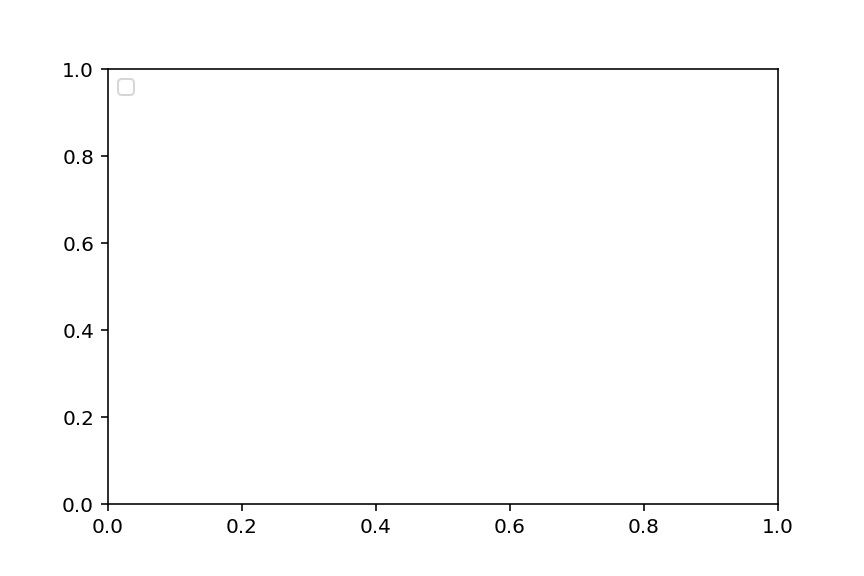

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


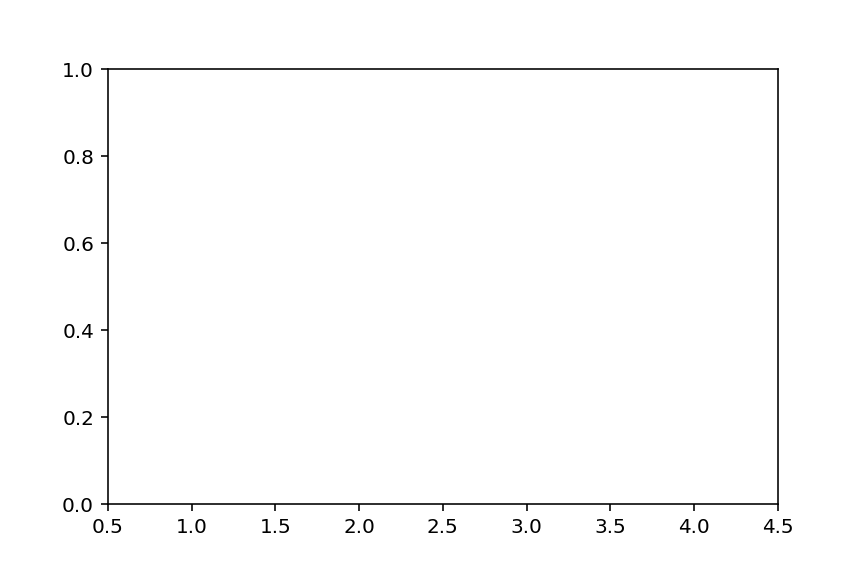

In [25]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


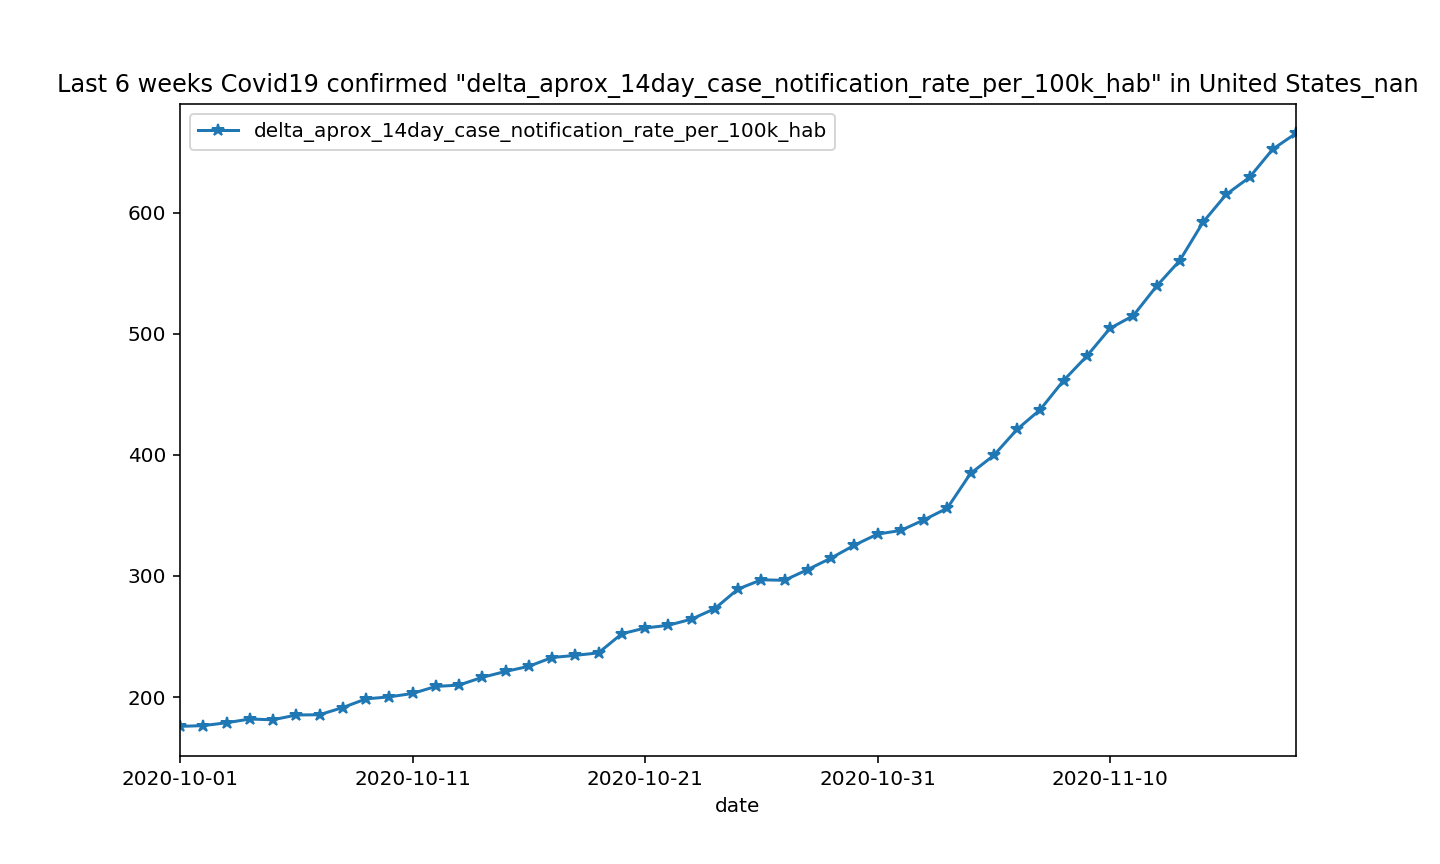

In [27]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


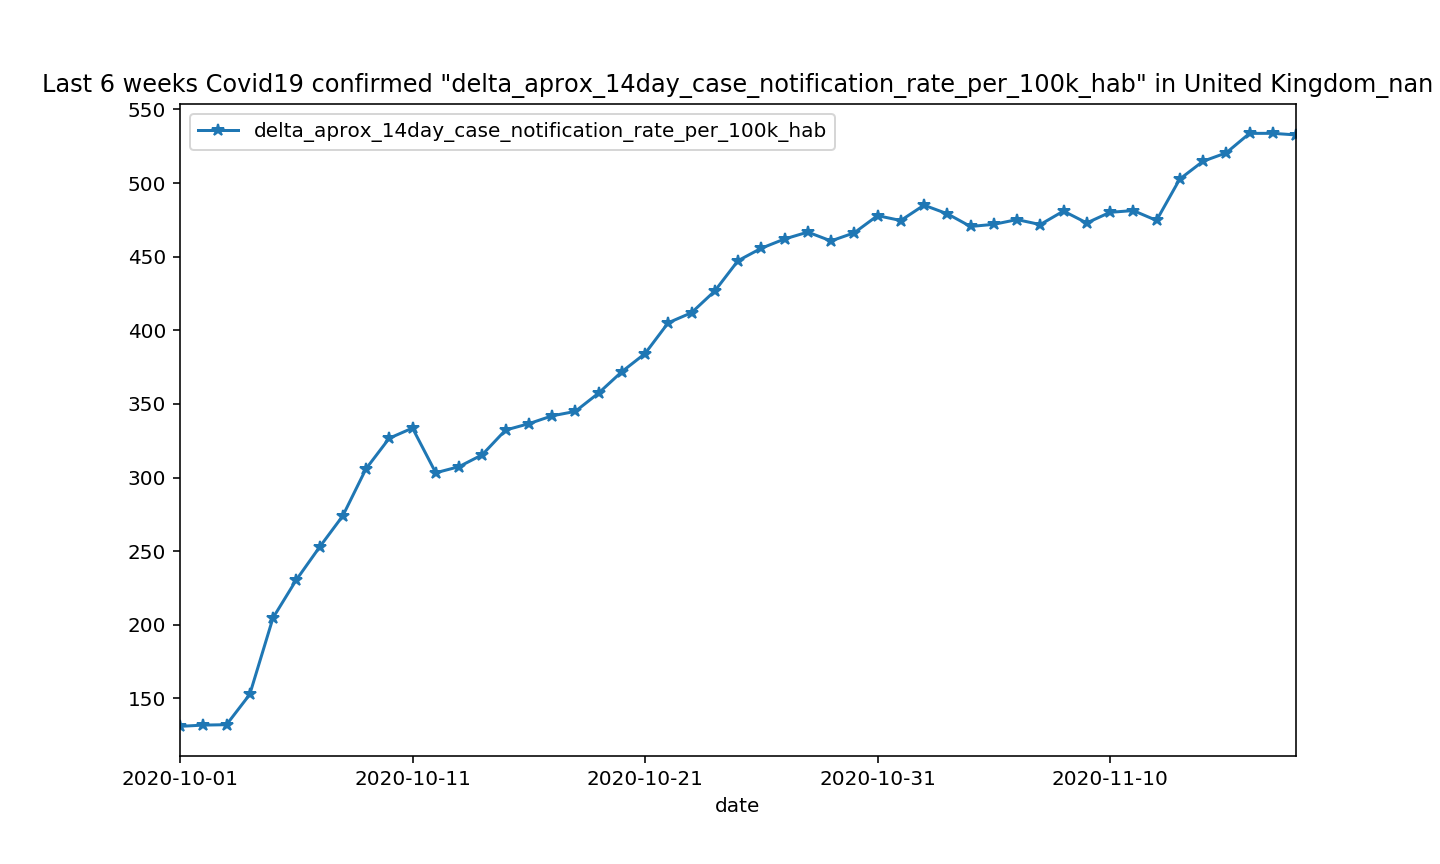

In [28]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


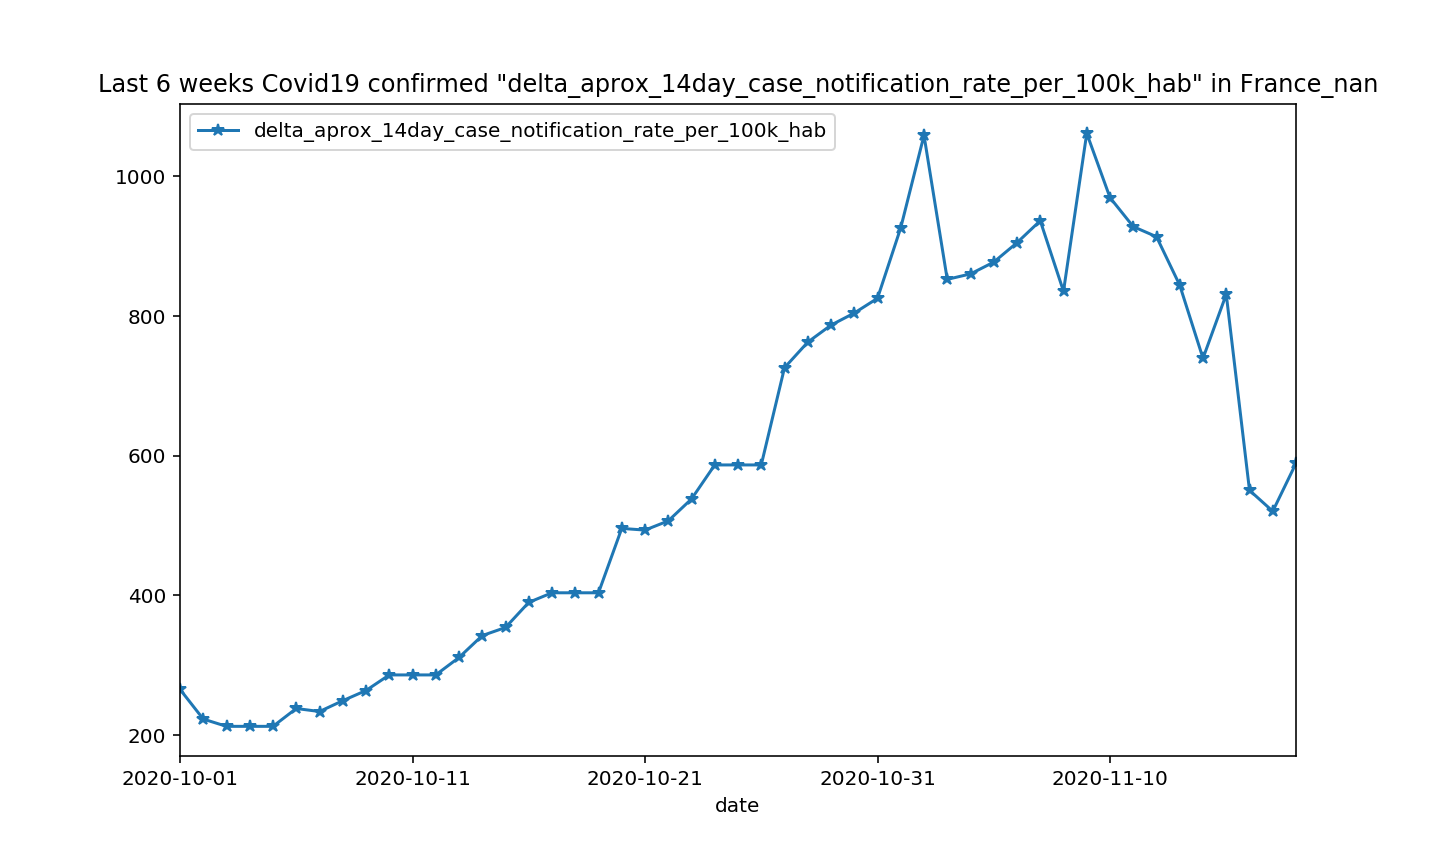

In [29]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


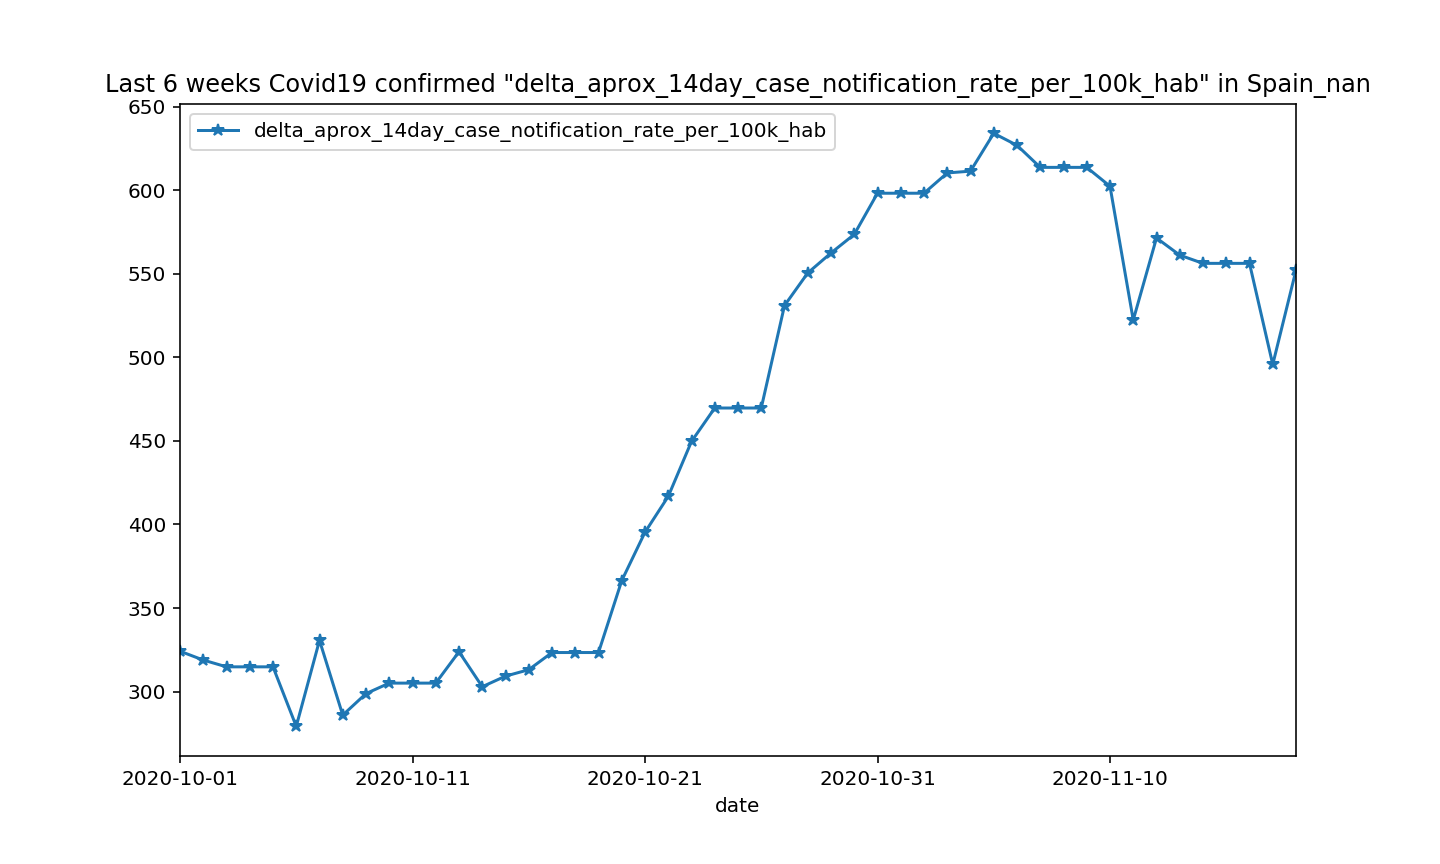

In [30]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


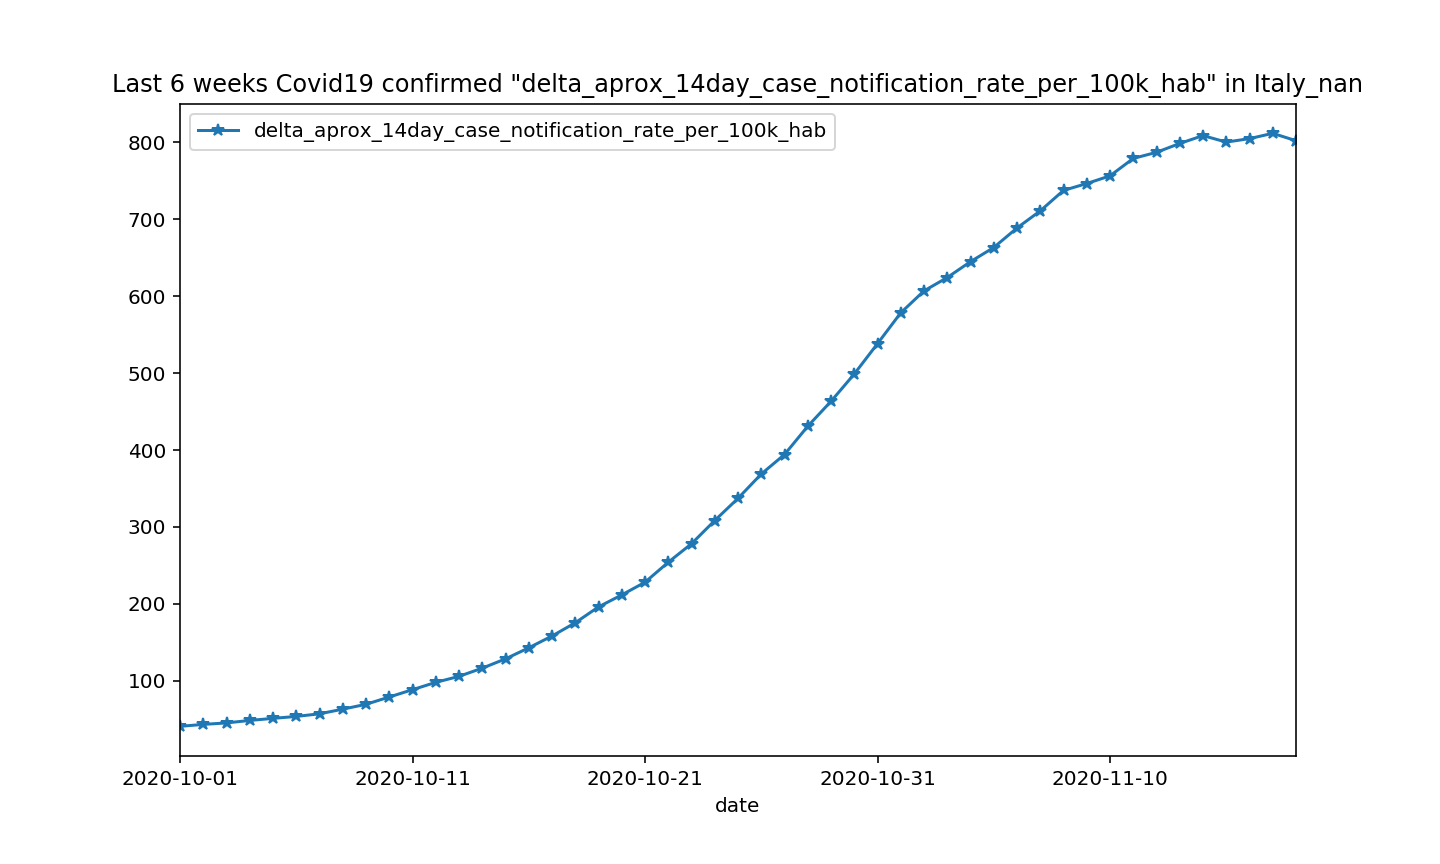

In [31]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


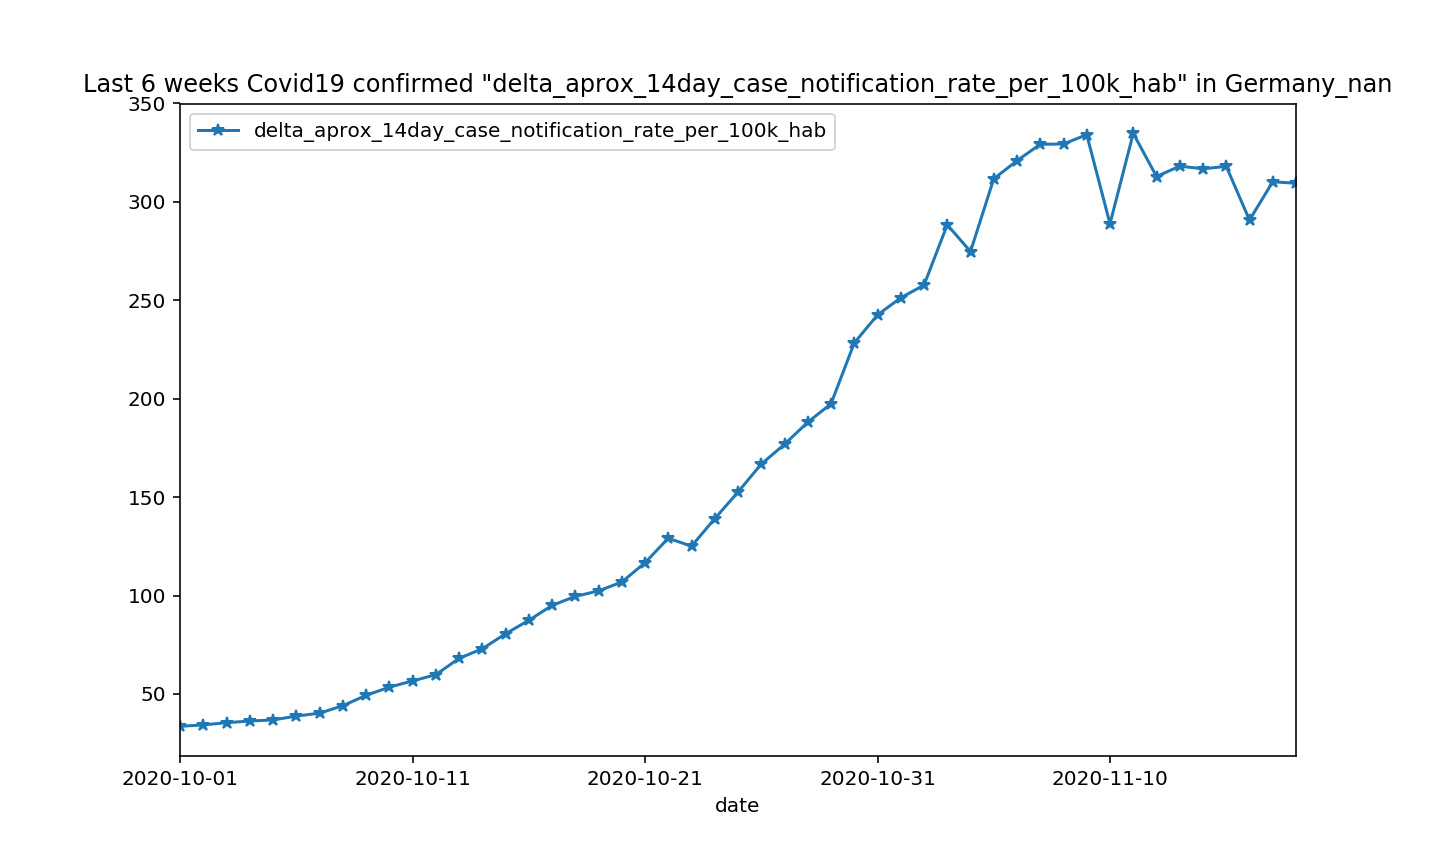

In [32]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


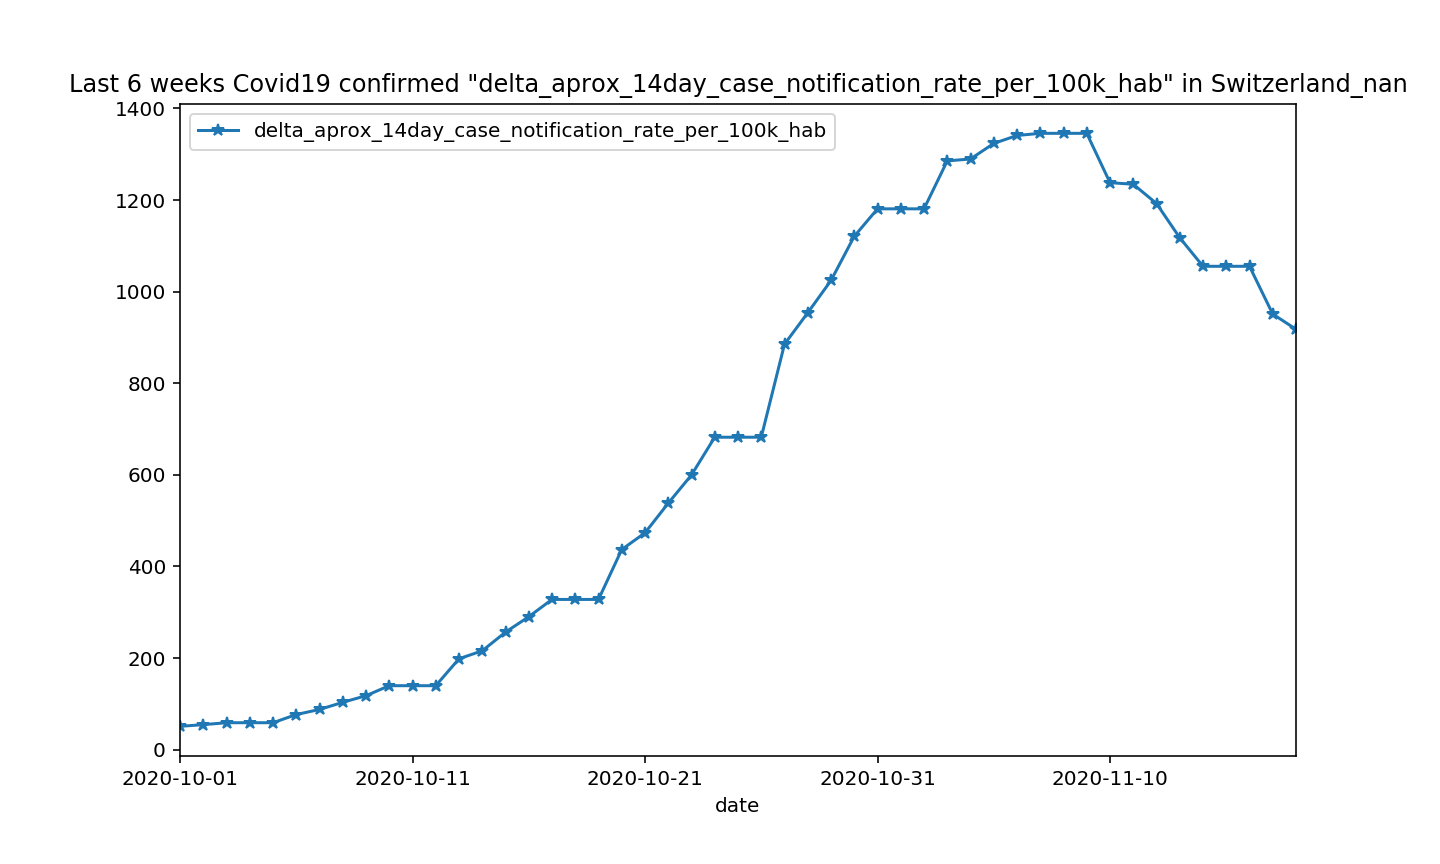

In [33]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


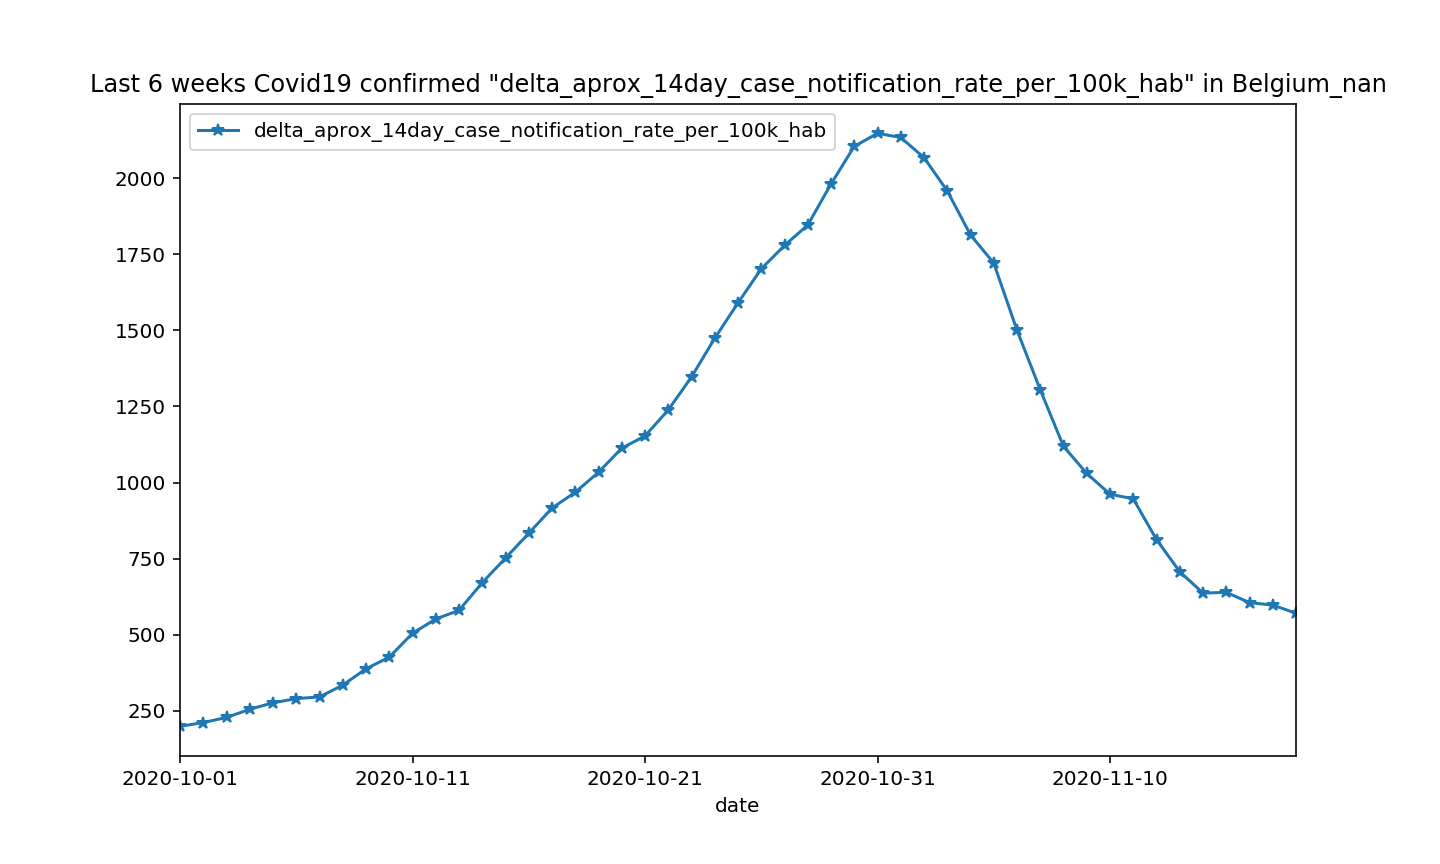

In [34]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


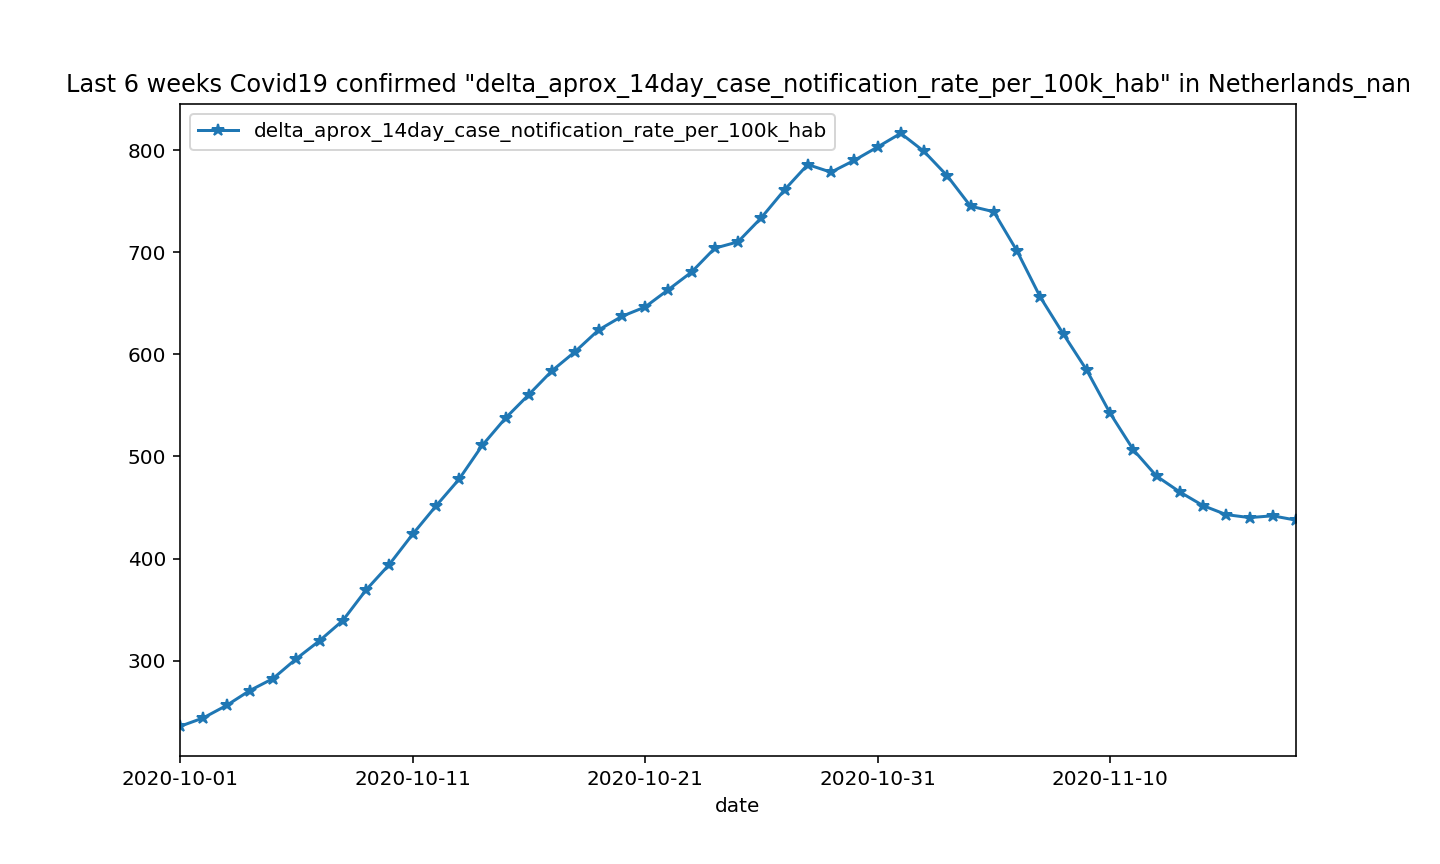

In [35]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


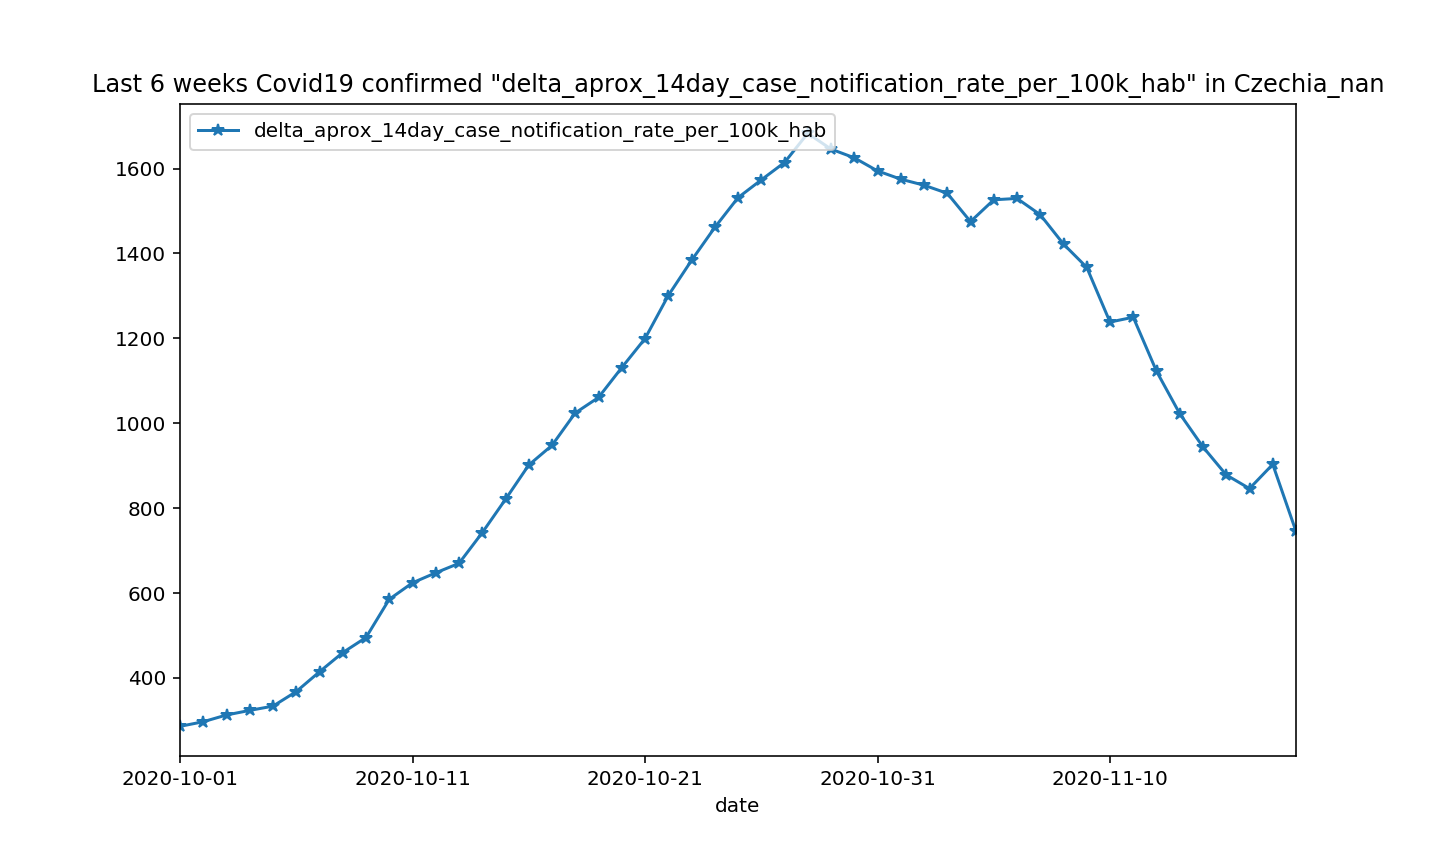

In [36]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


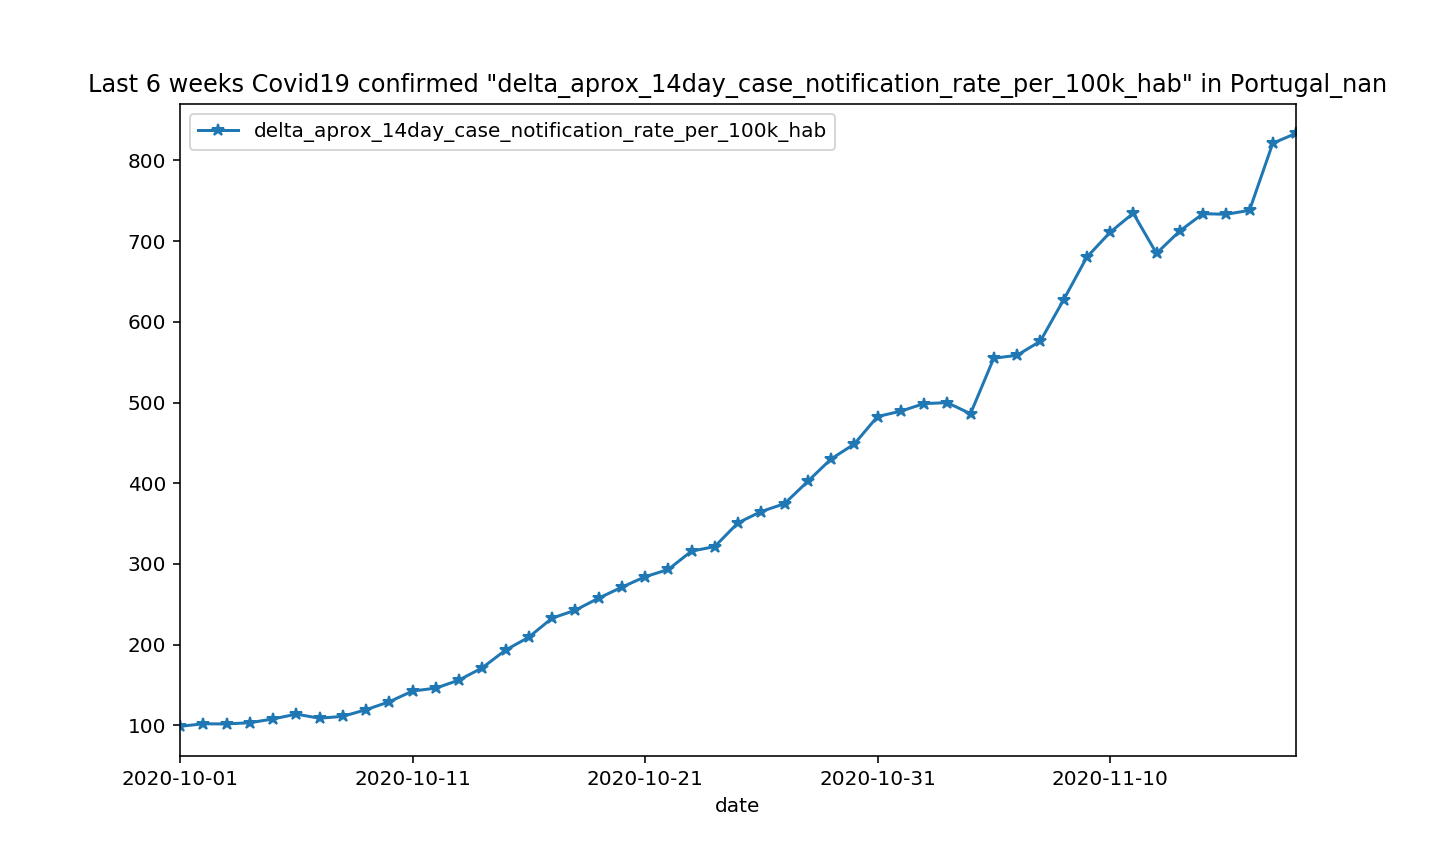

In [37]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [38]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


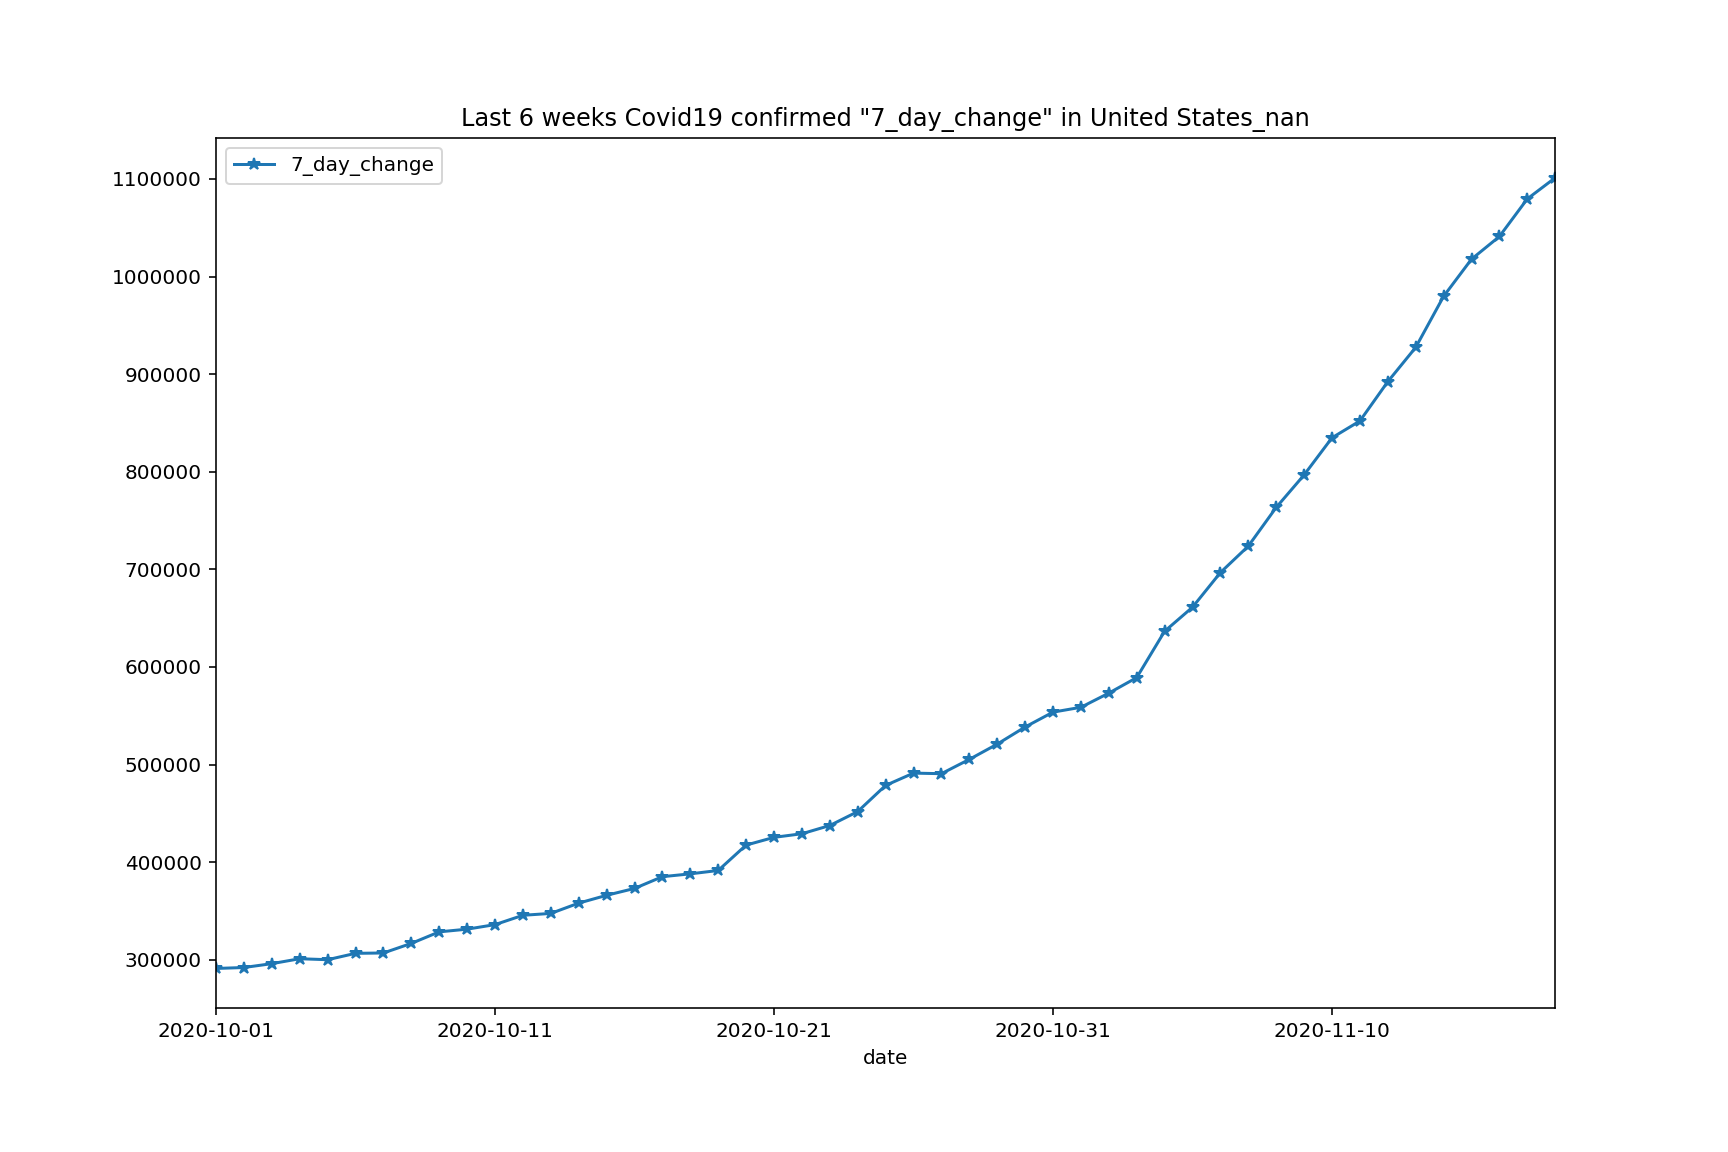

In [39]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


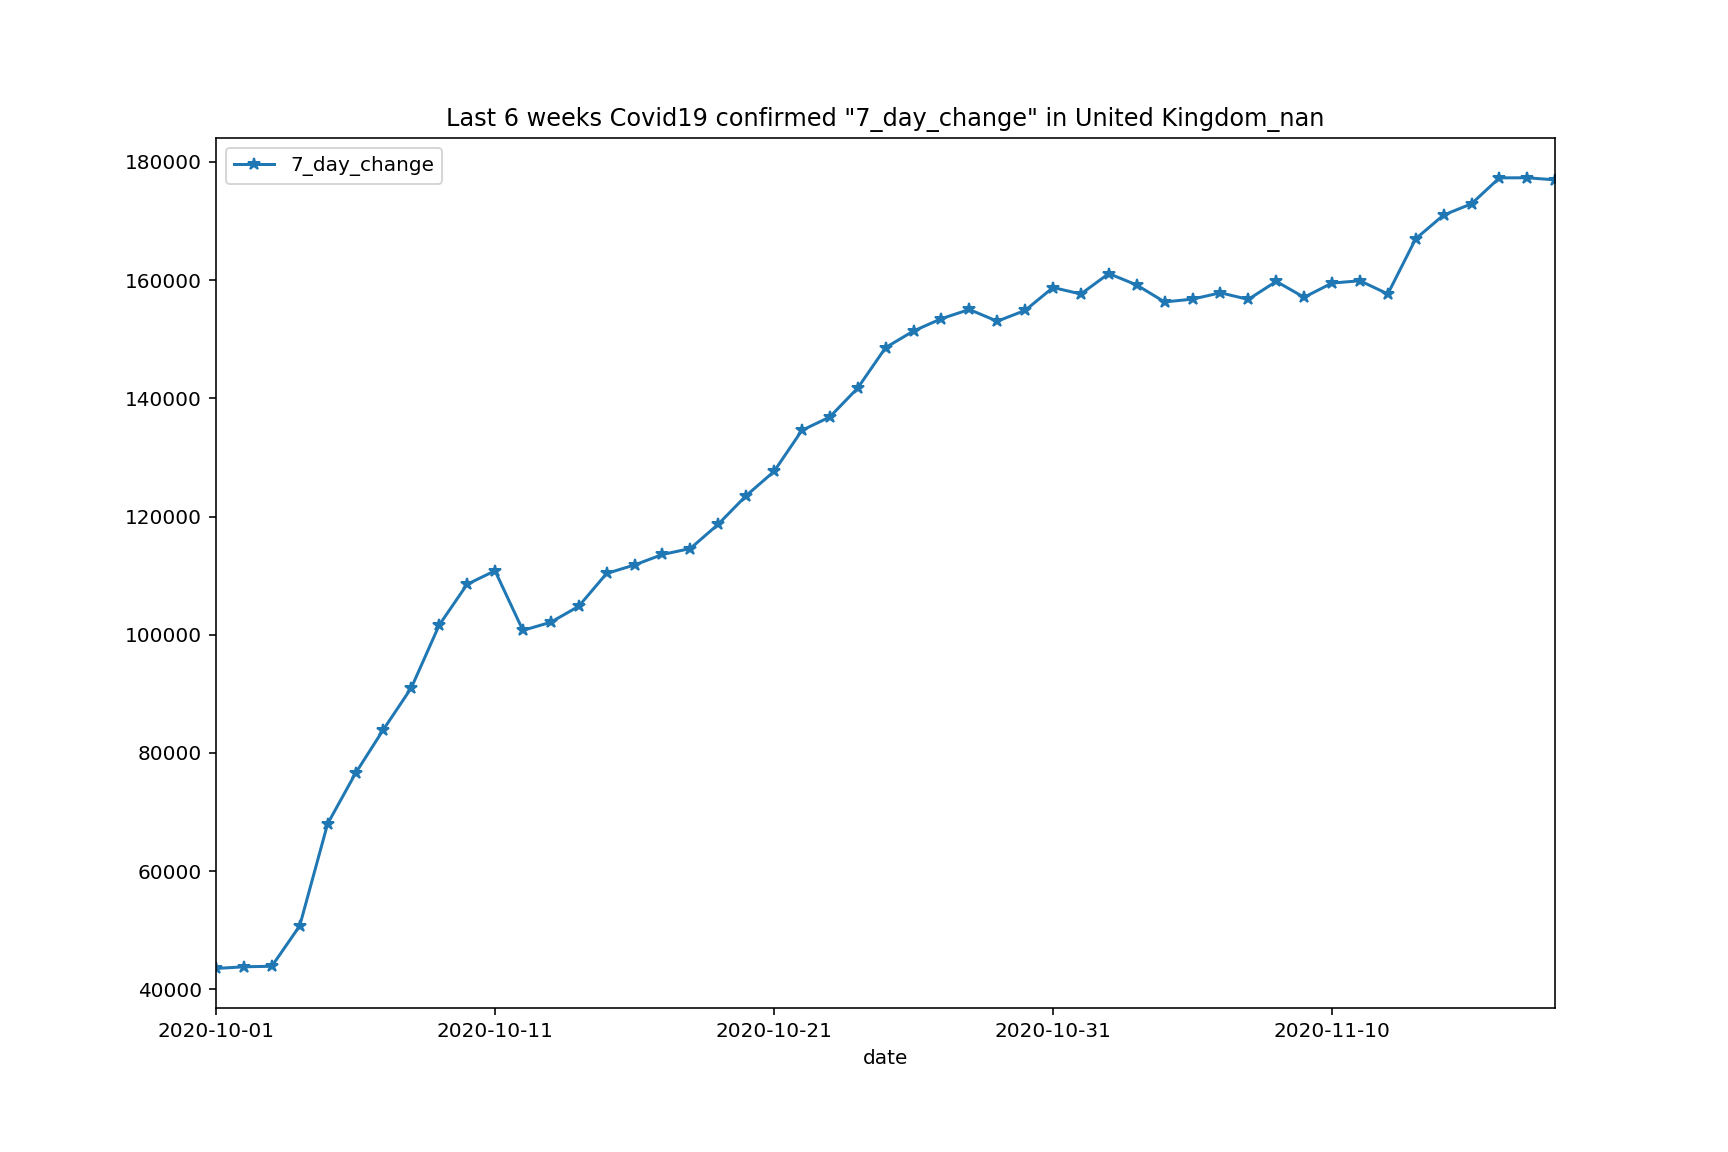

In [40]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


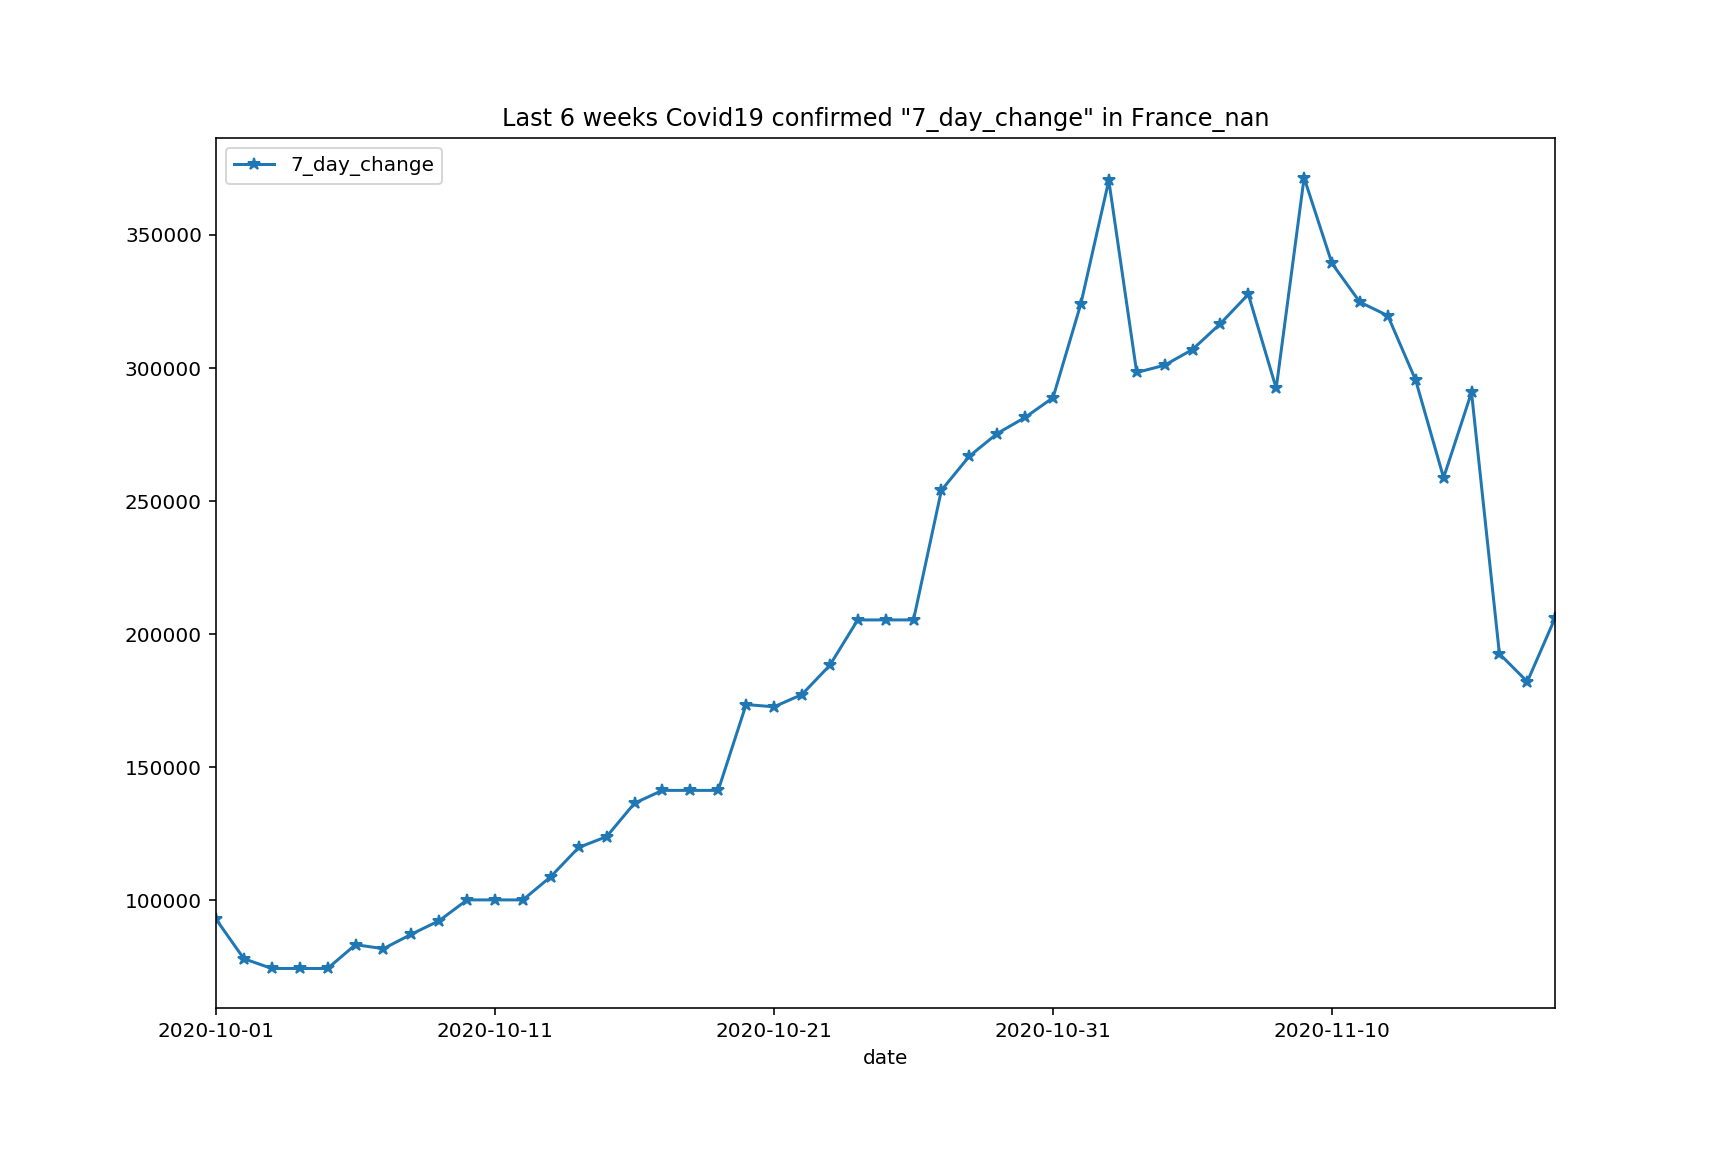

In [41]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


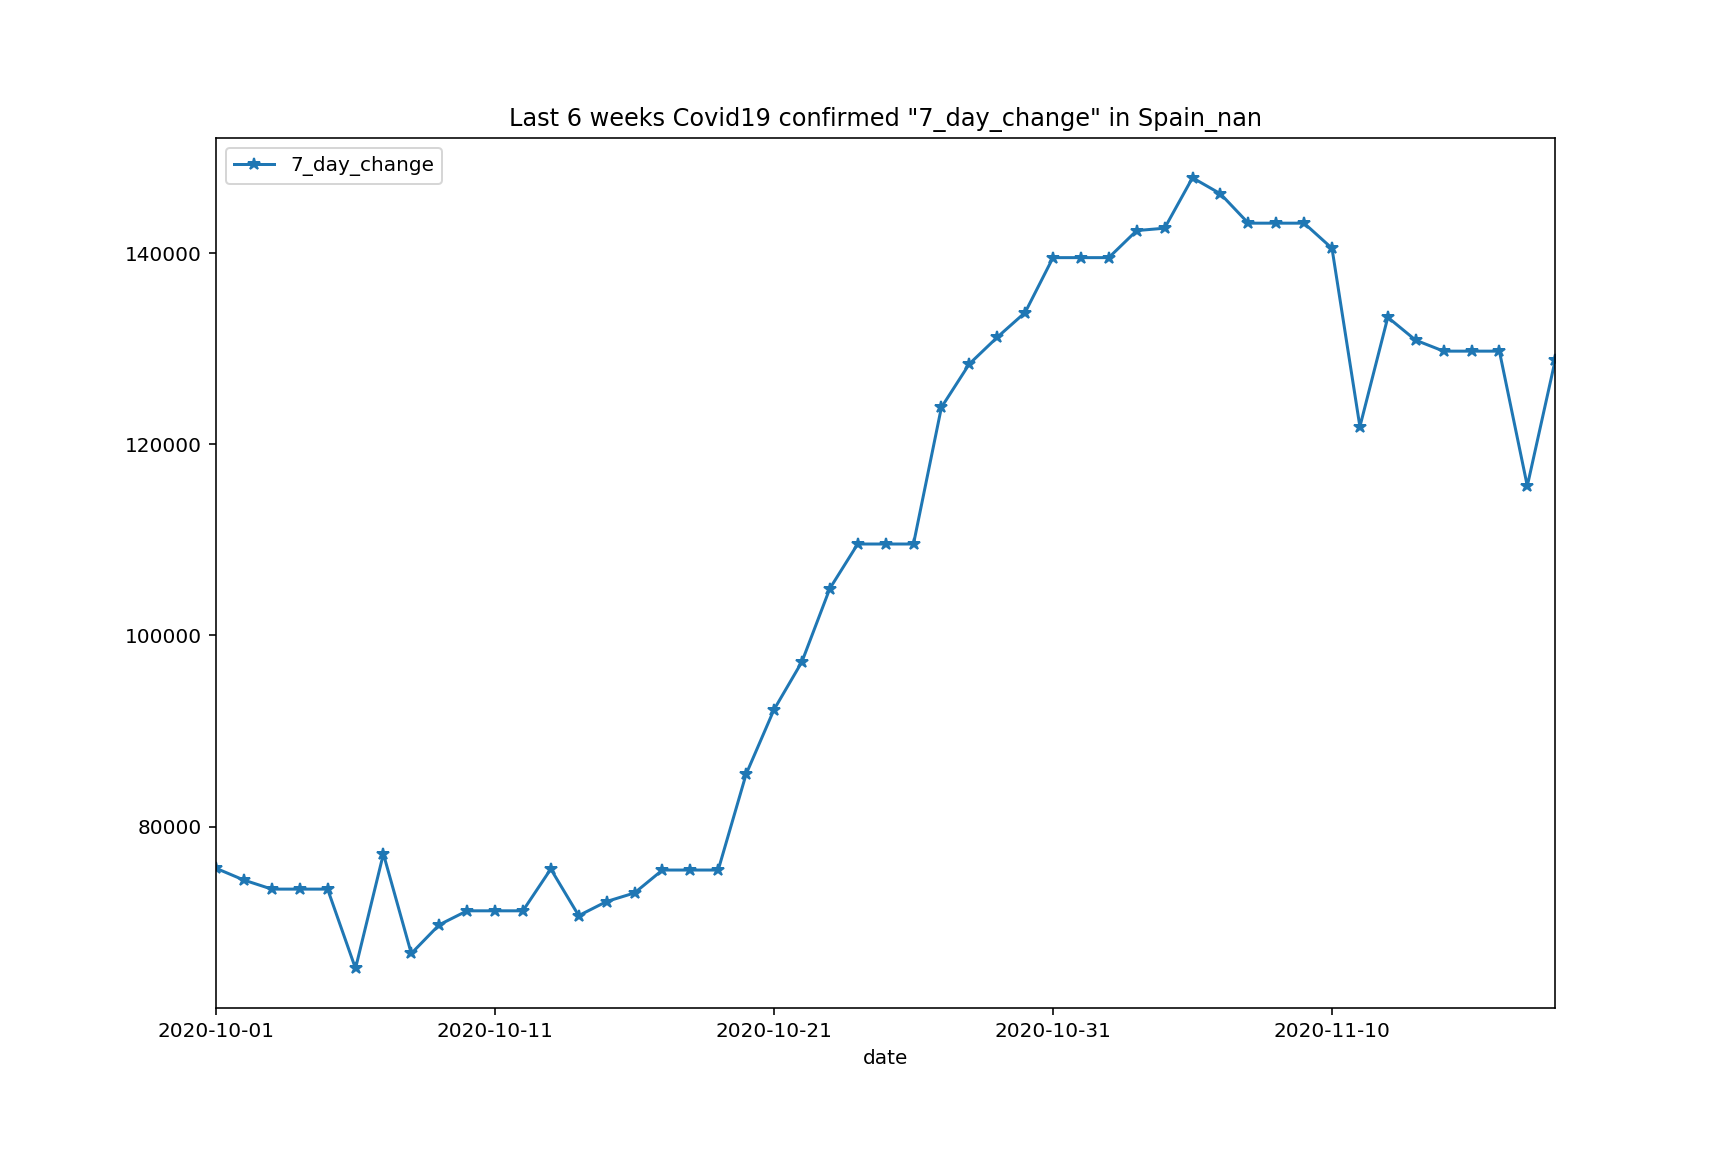

In [42]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


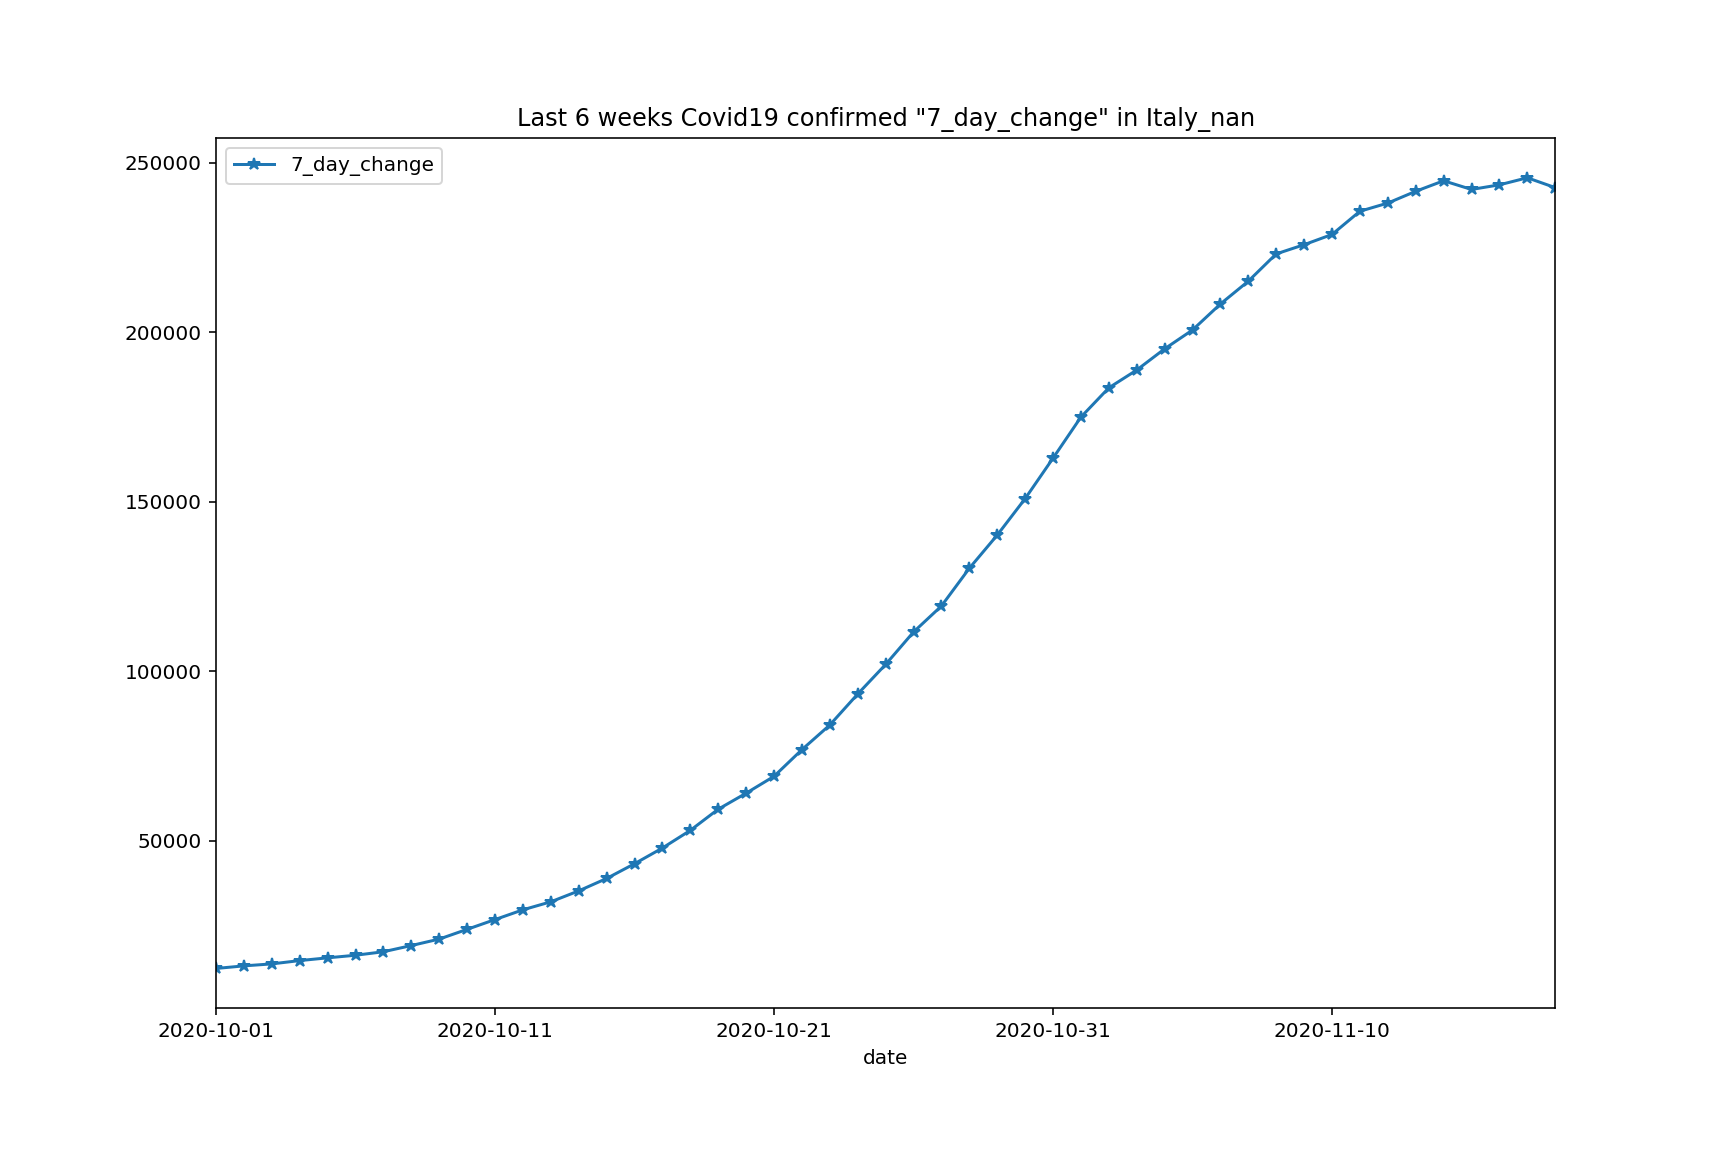

In [43]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


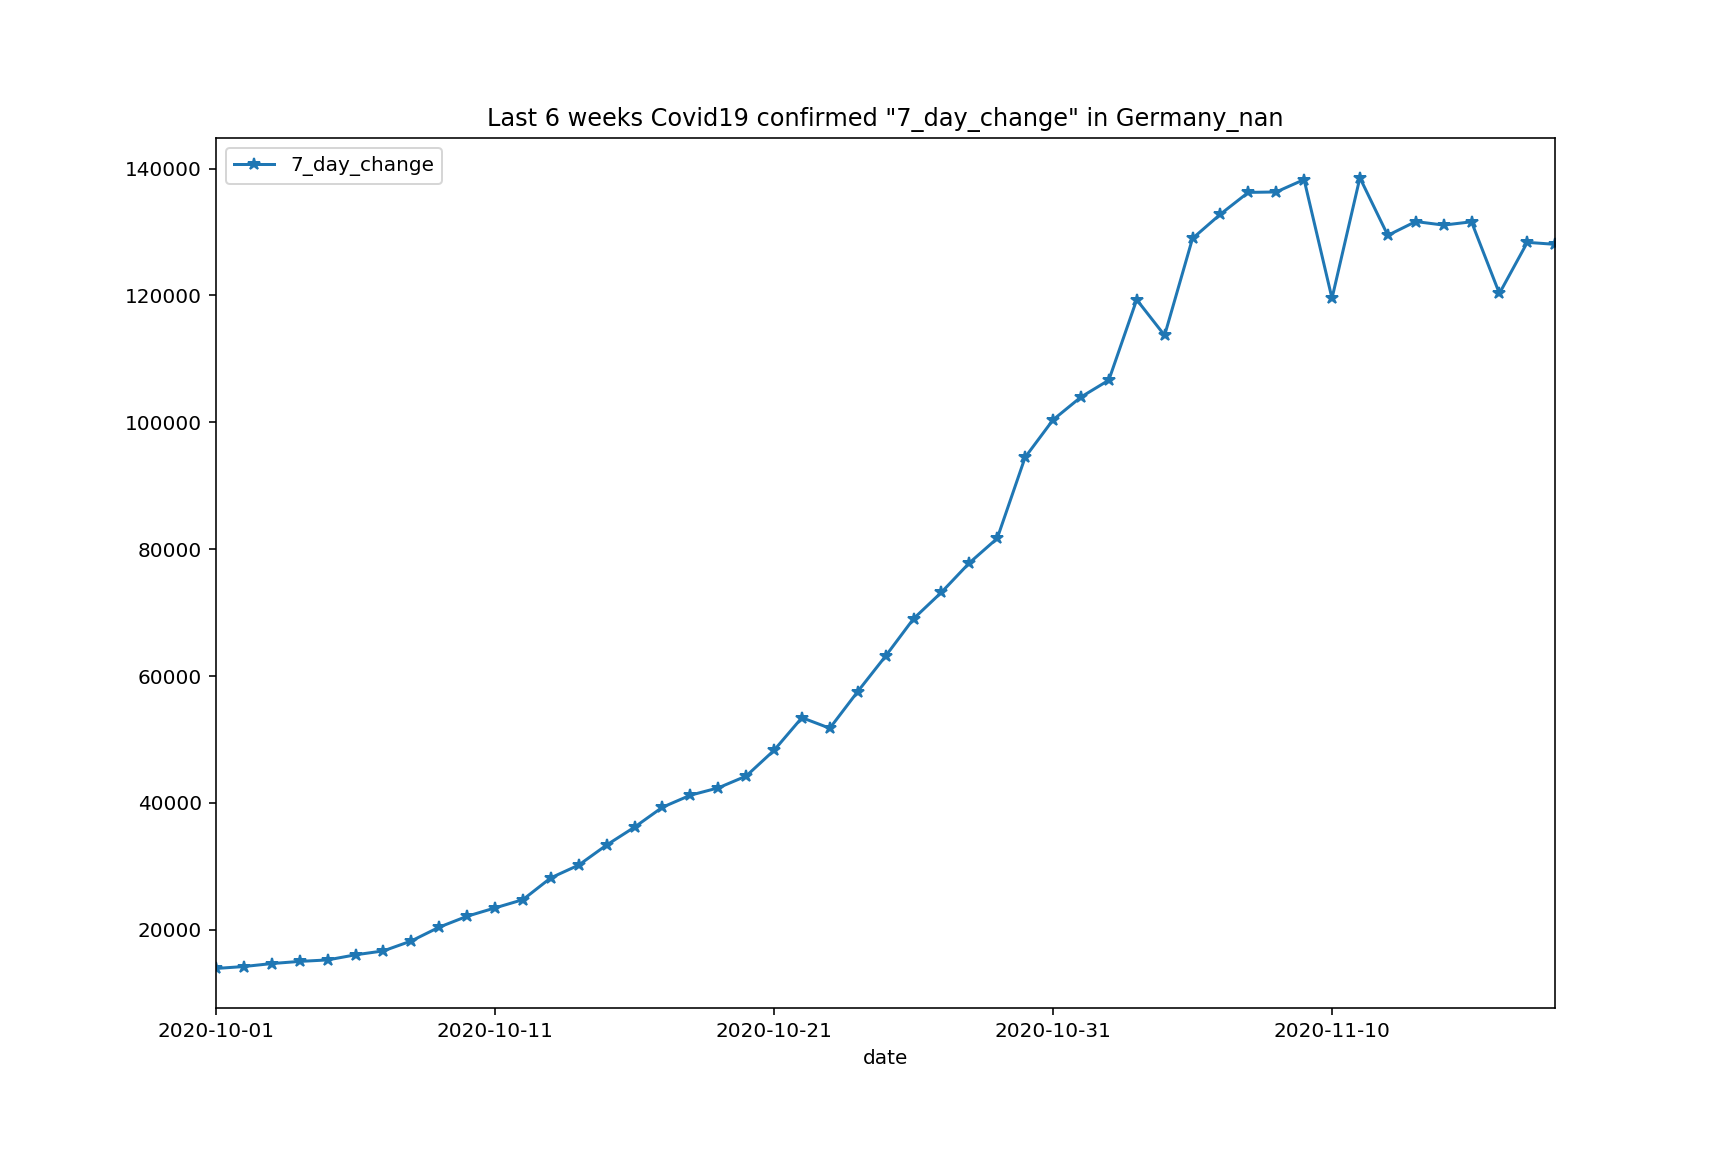

In [44]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


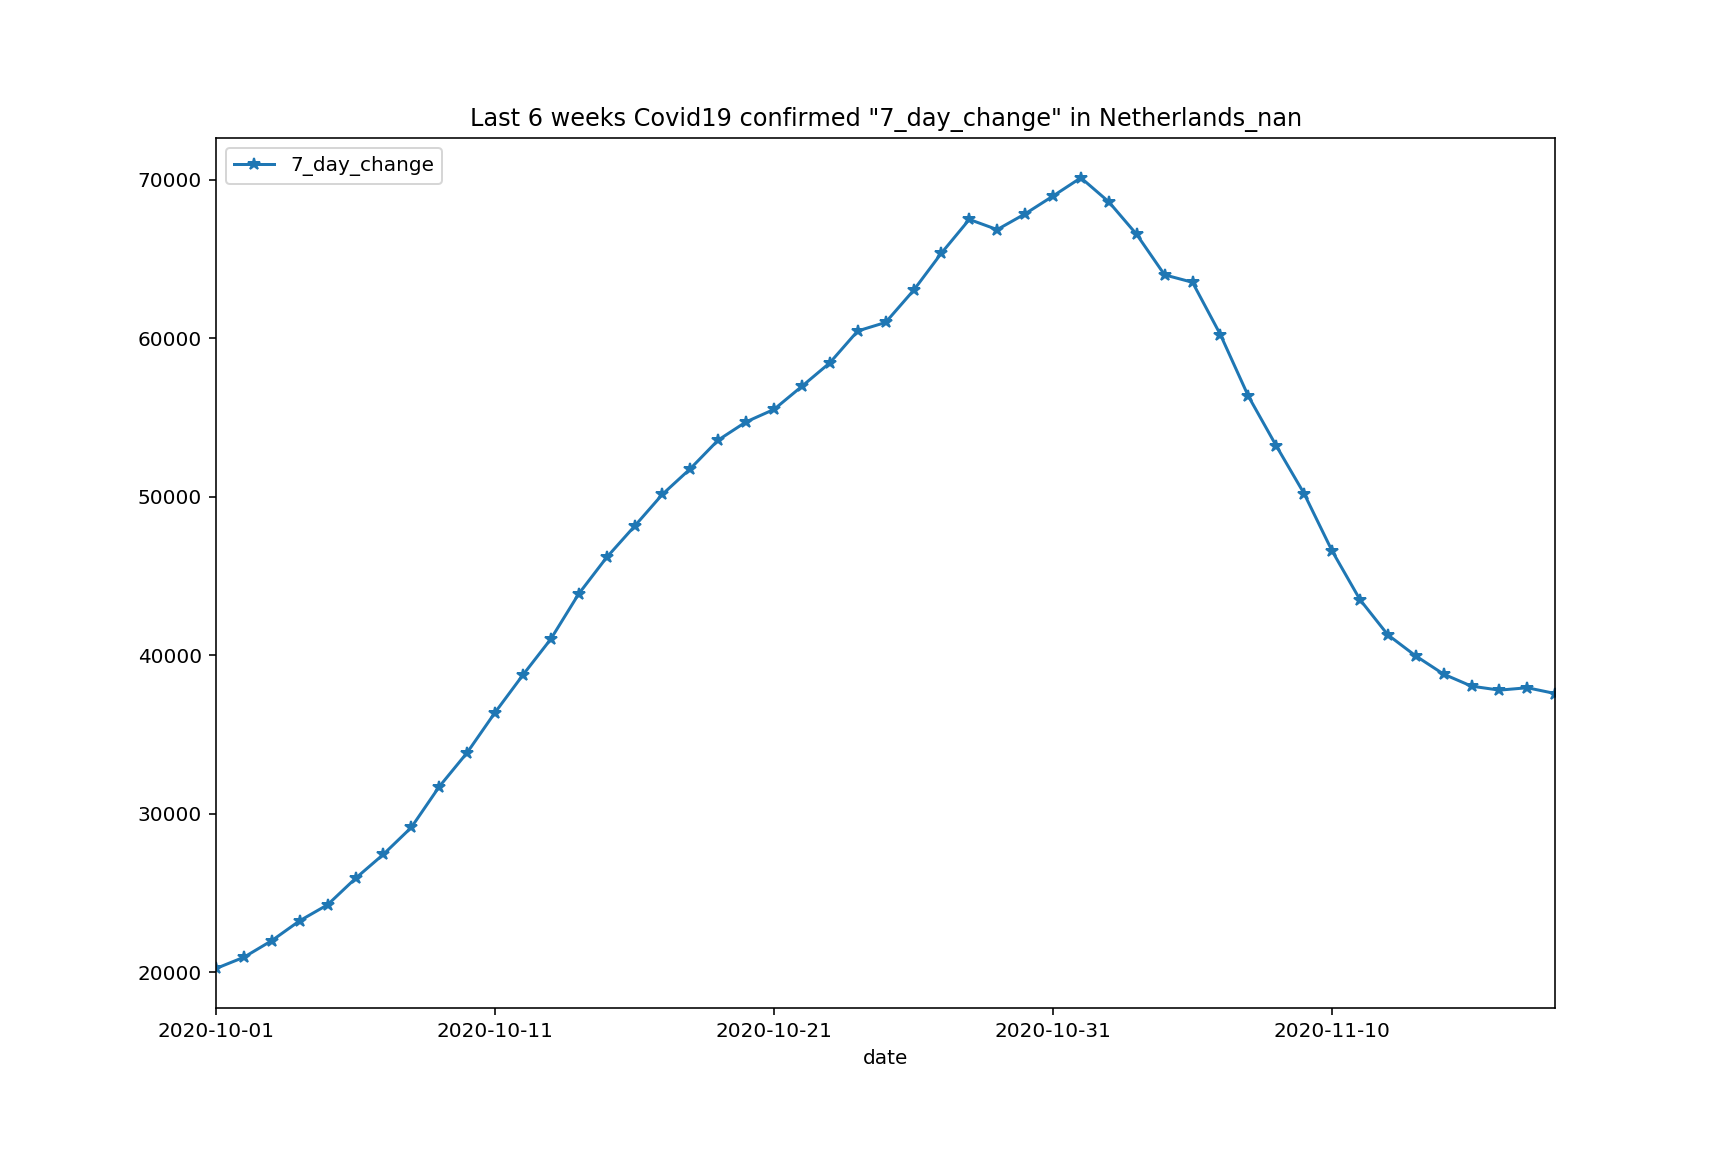

In [45]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


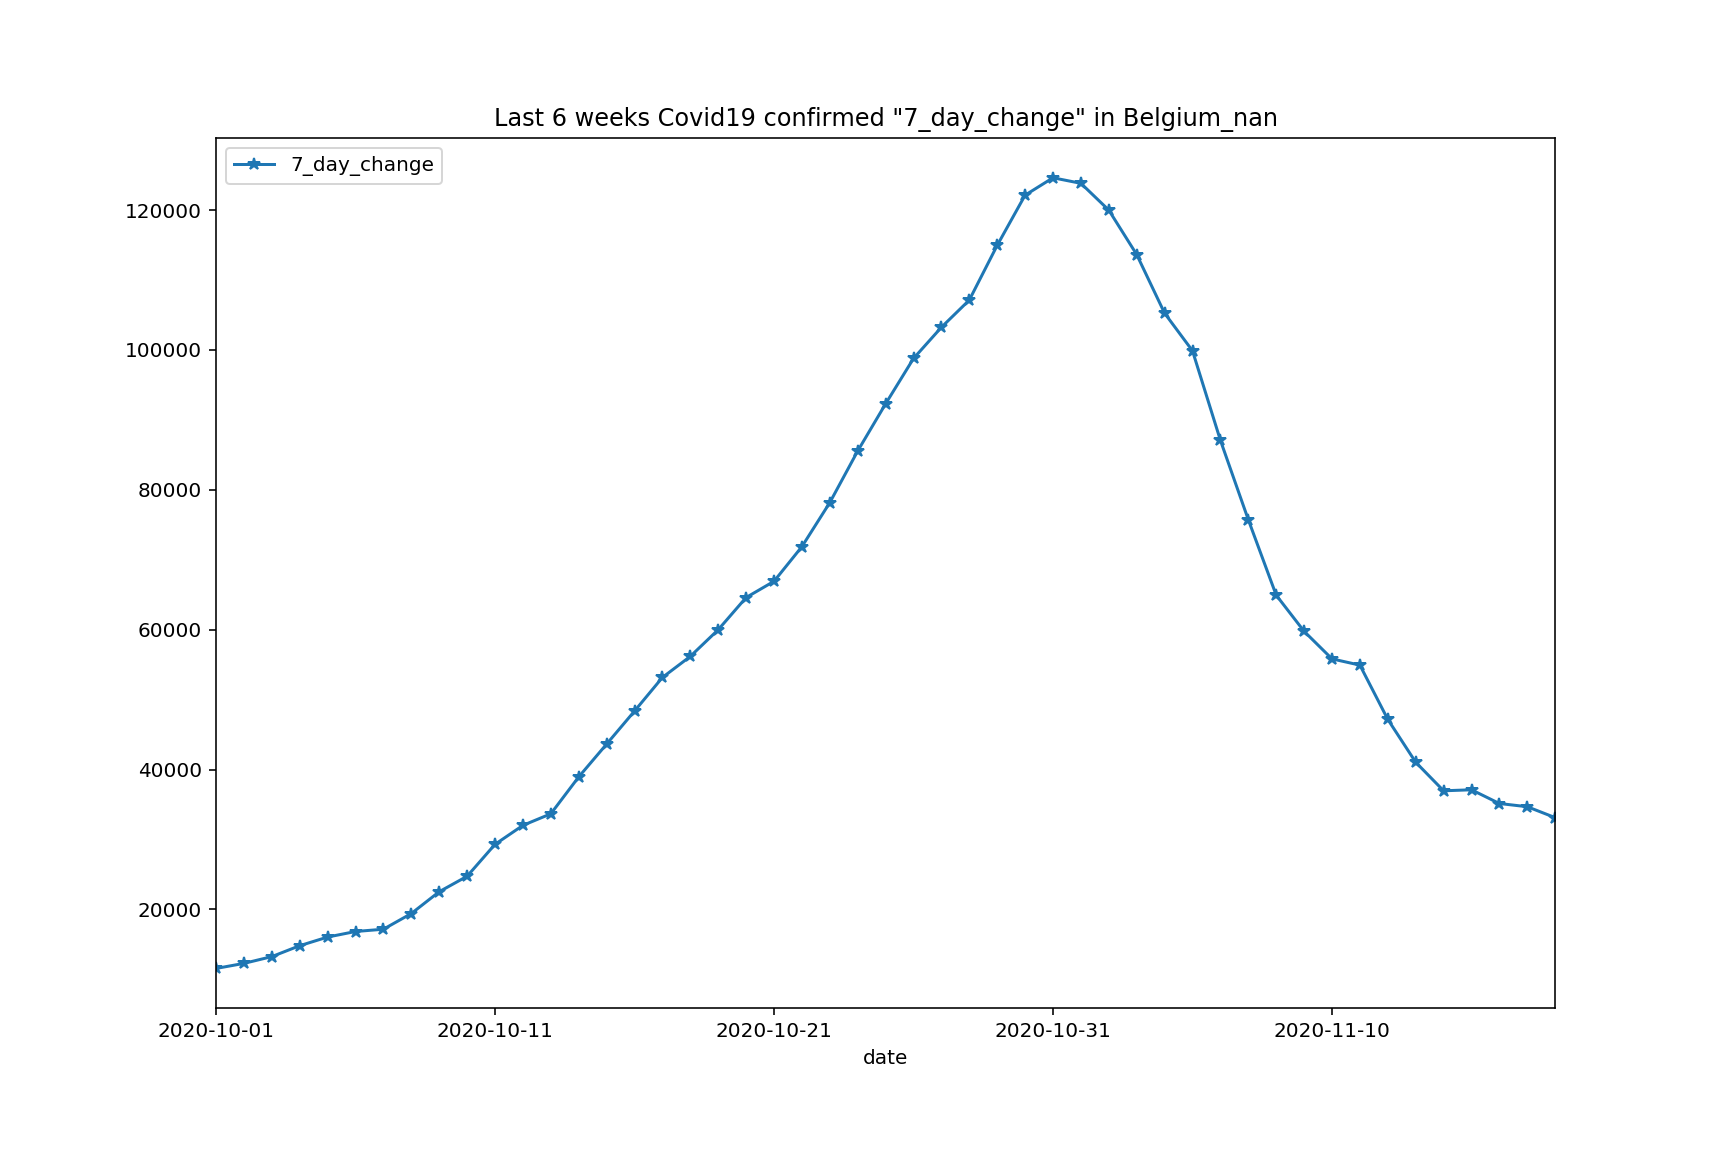

In [46]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


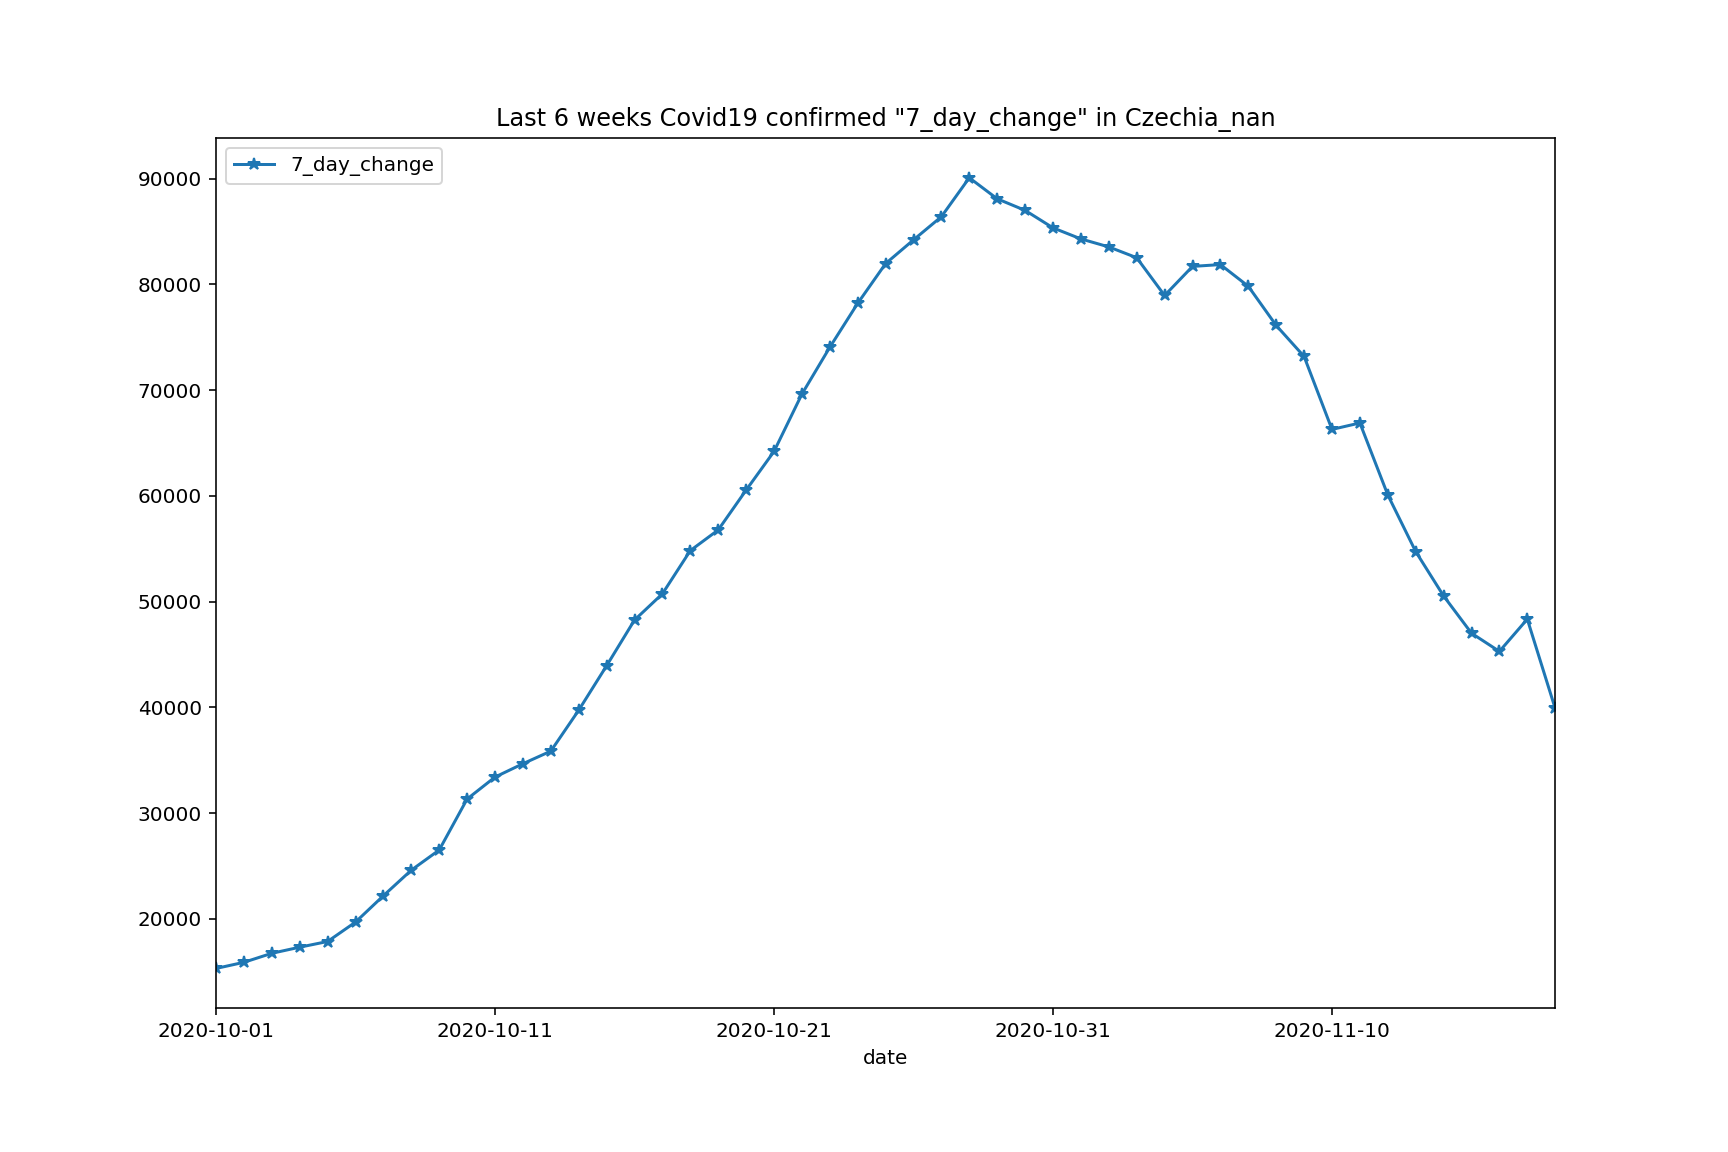

In [47]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


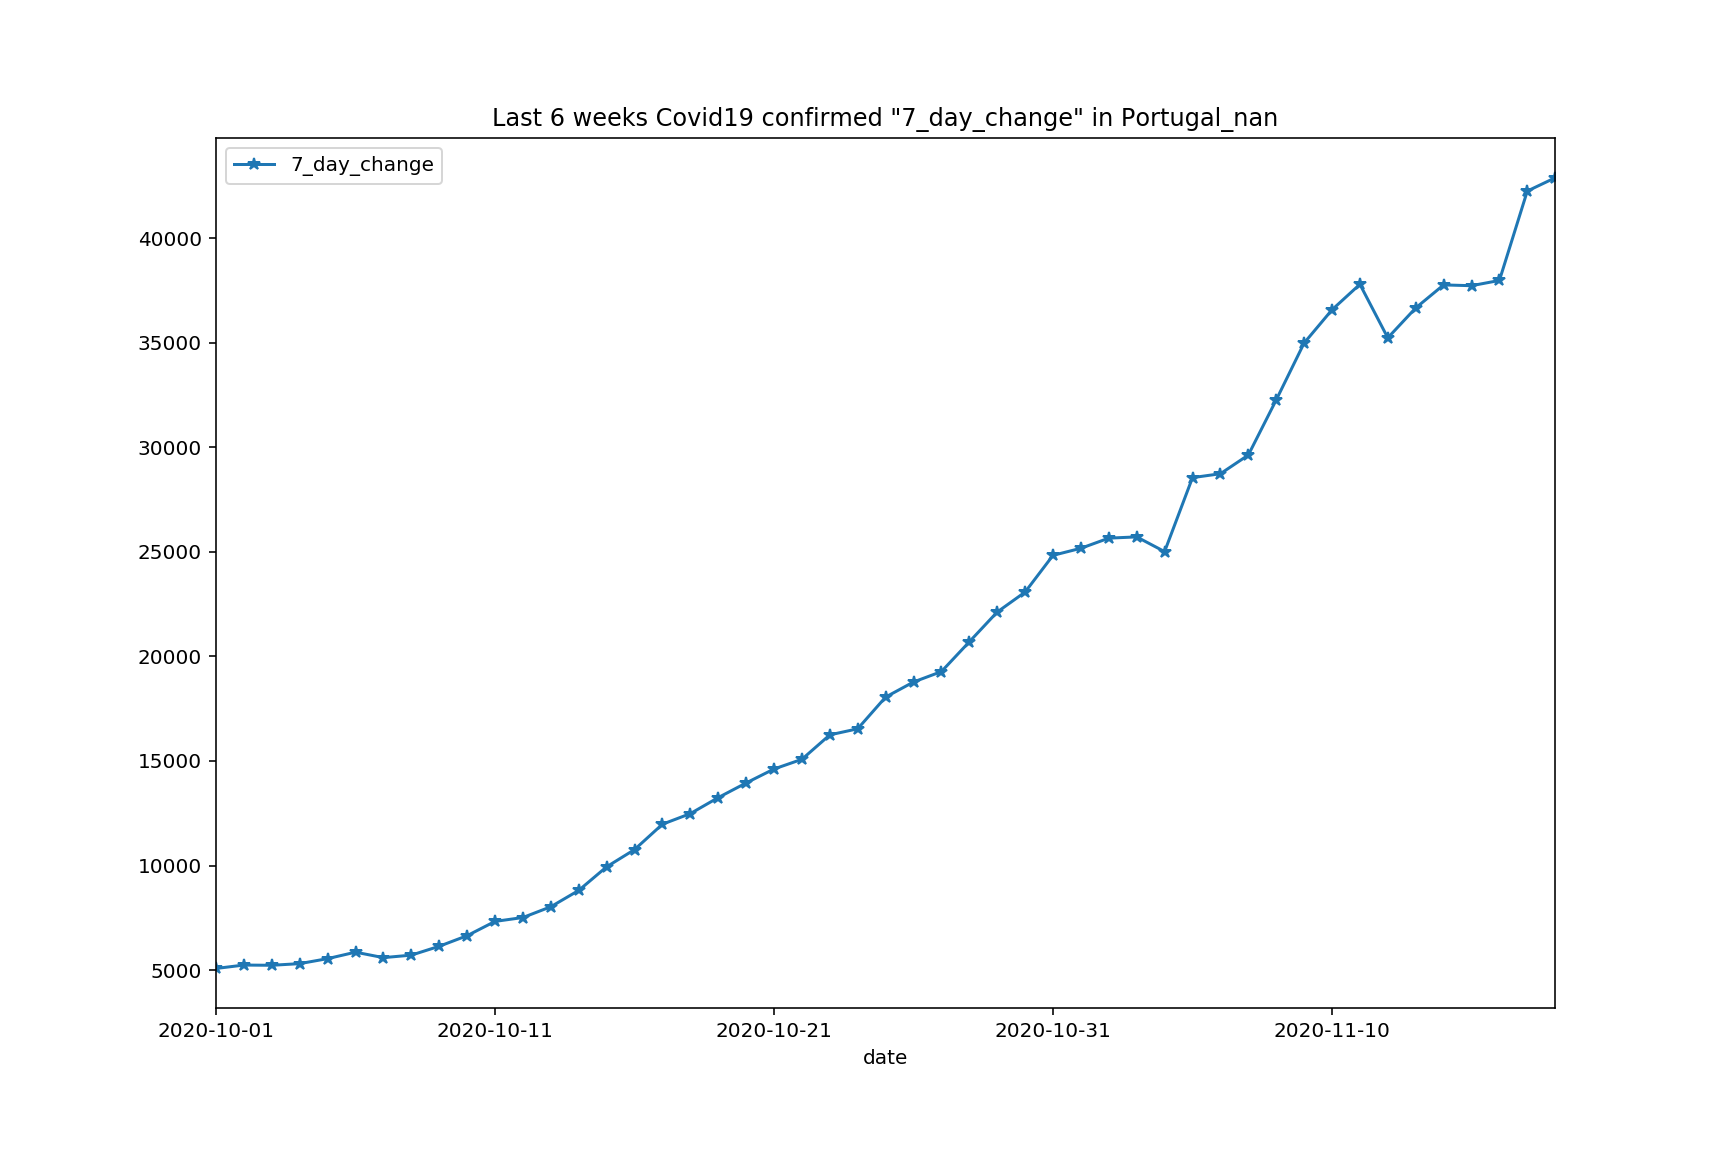

In [48]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [49]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


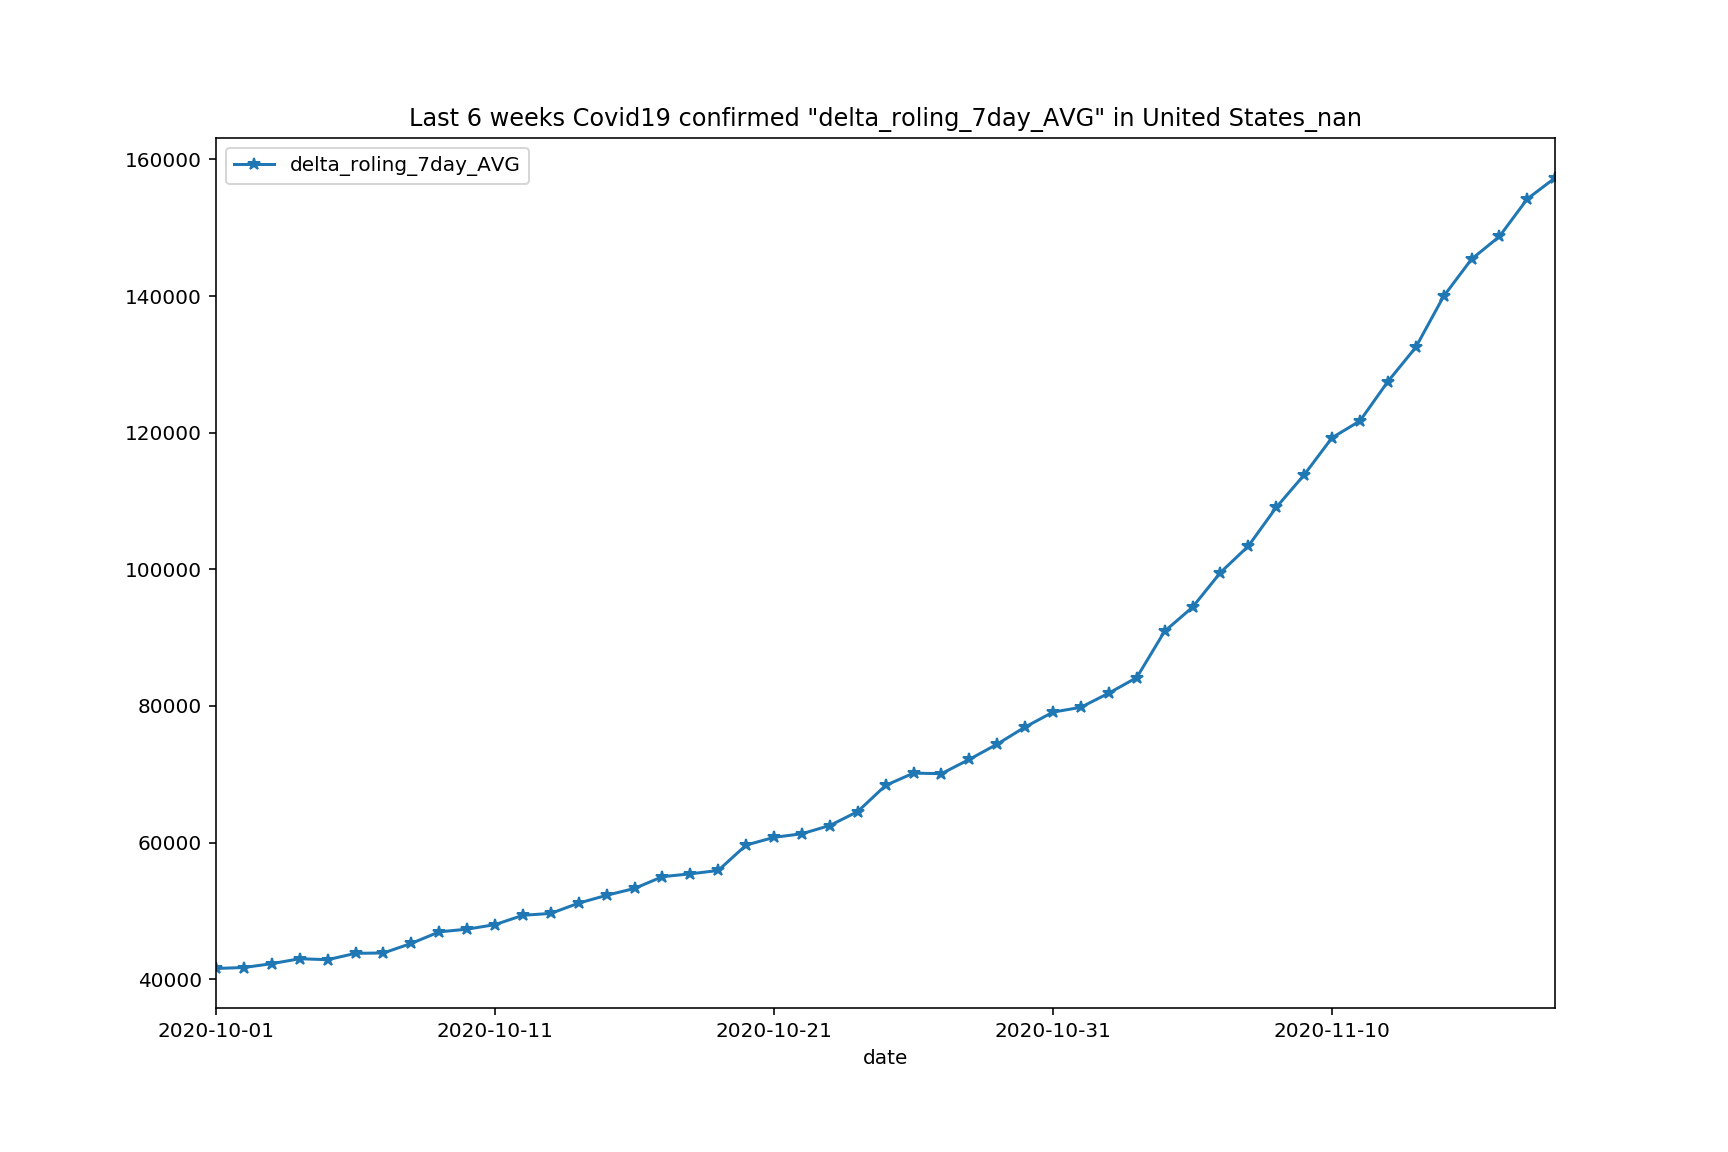

In [50]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


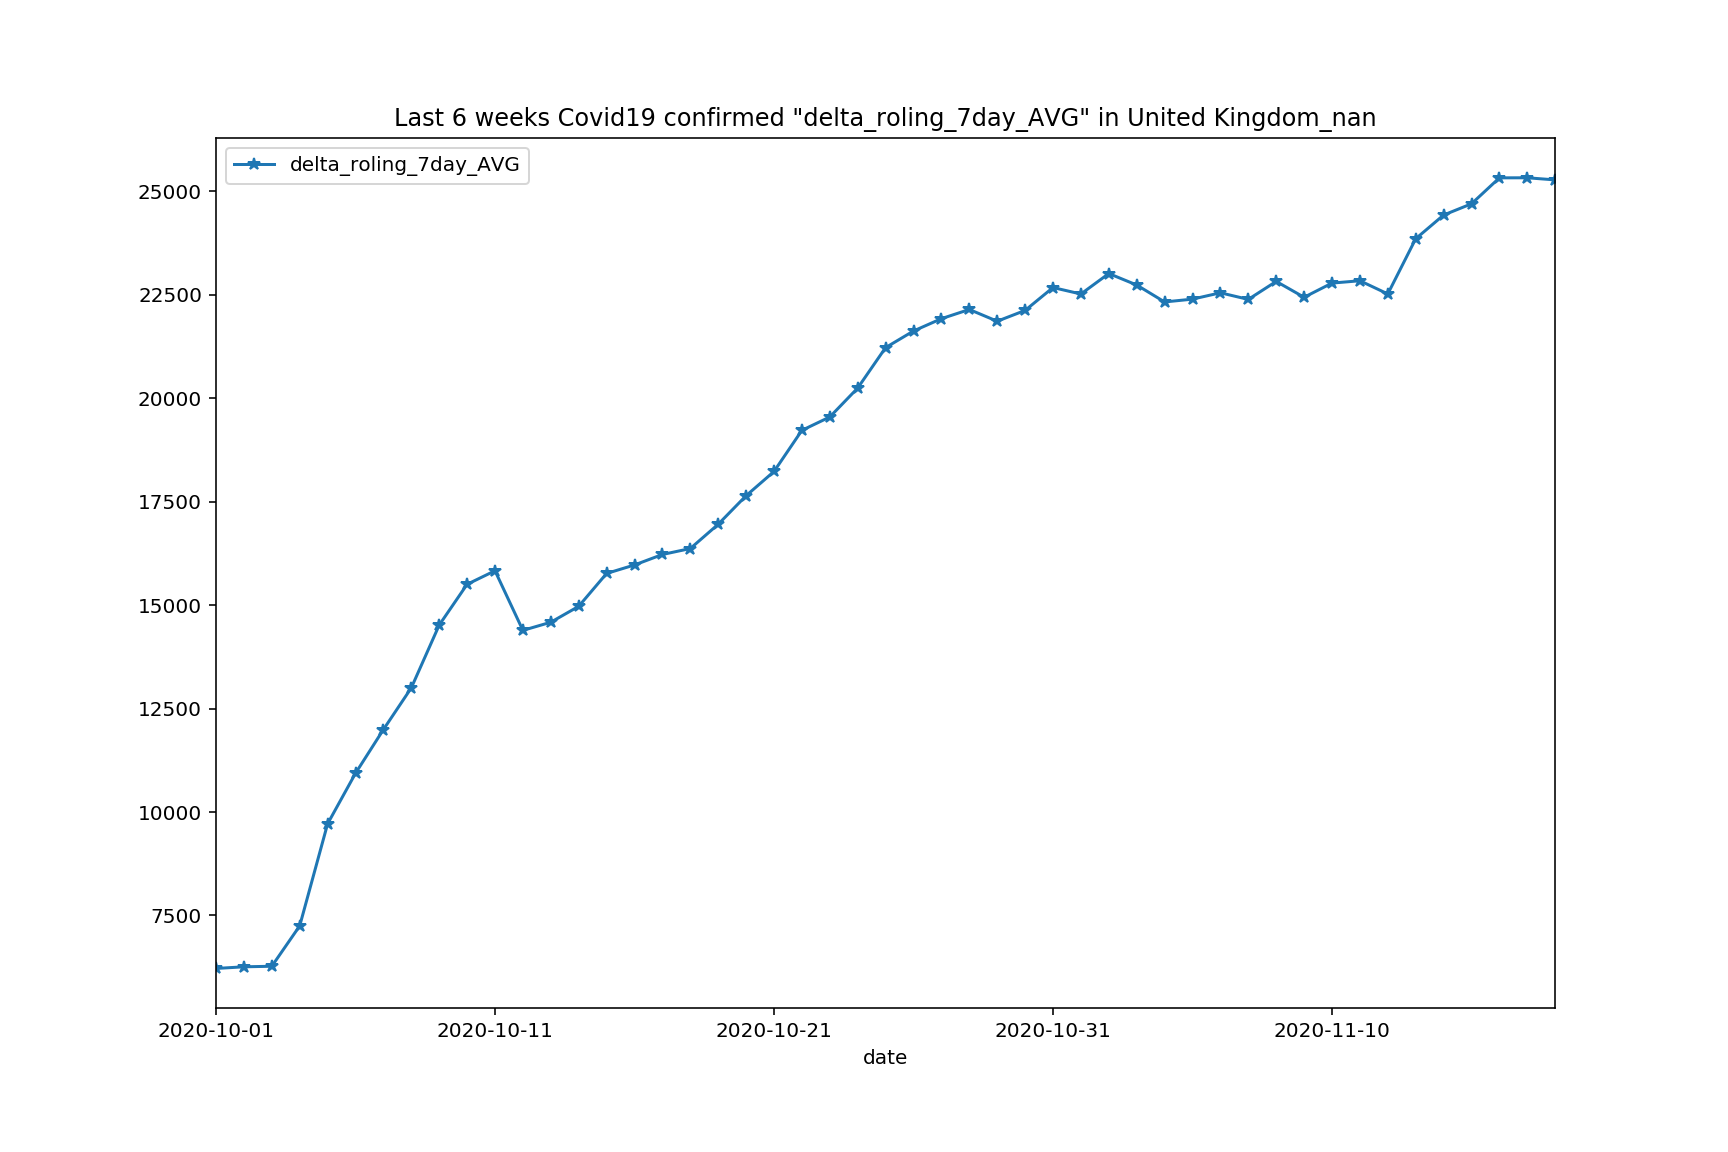

In [51]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


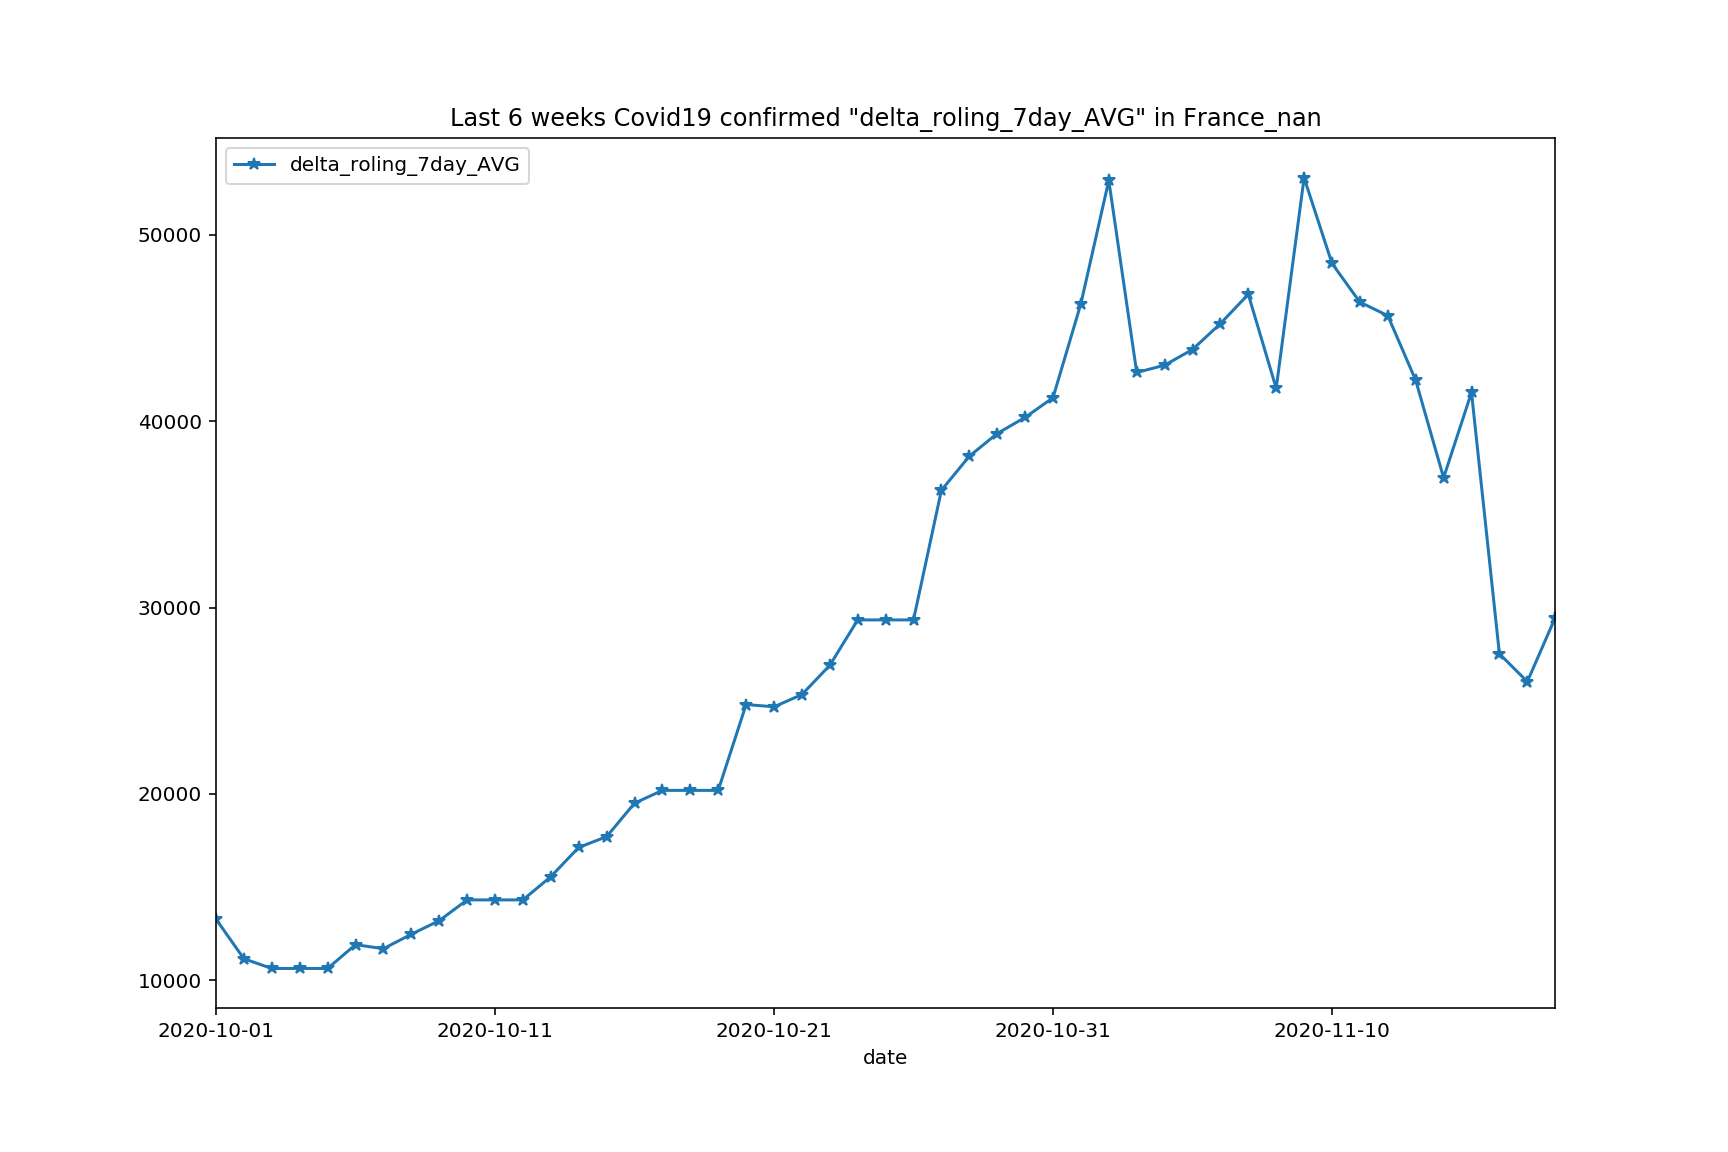

In [52]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


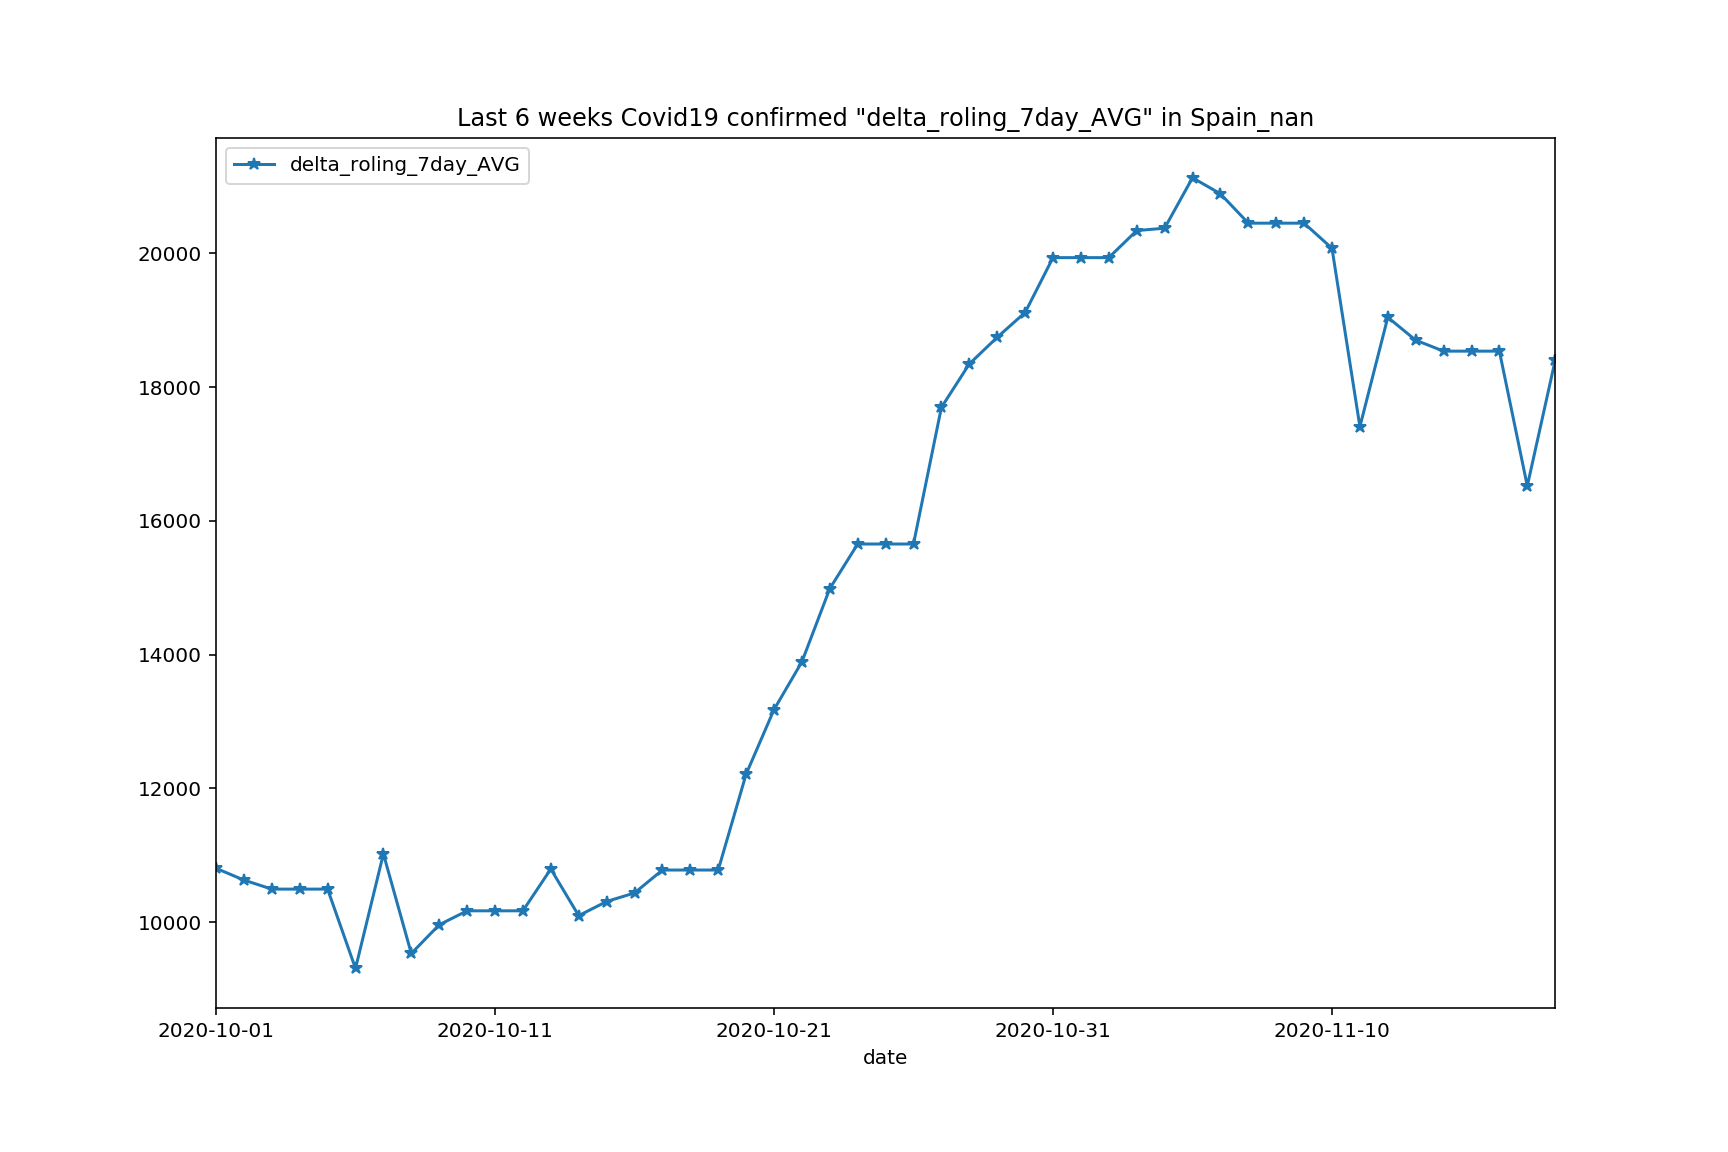

In [53]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


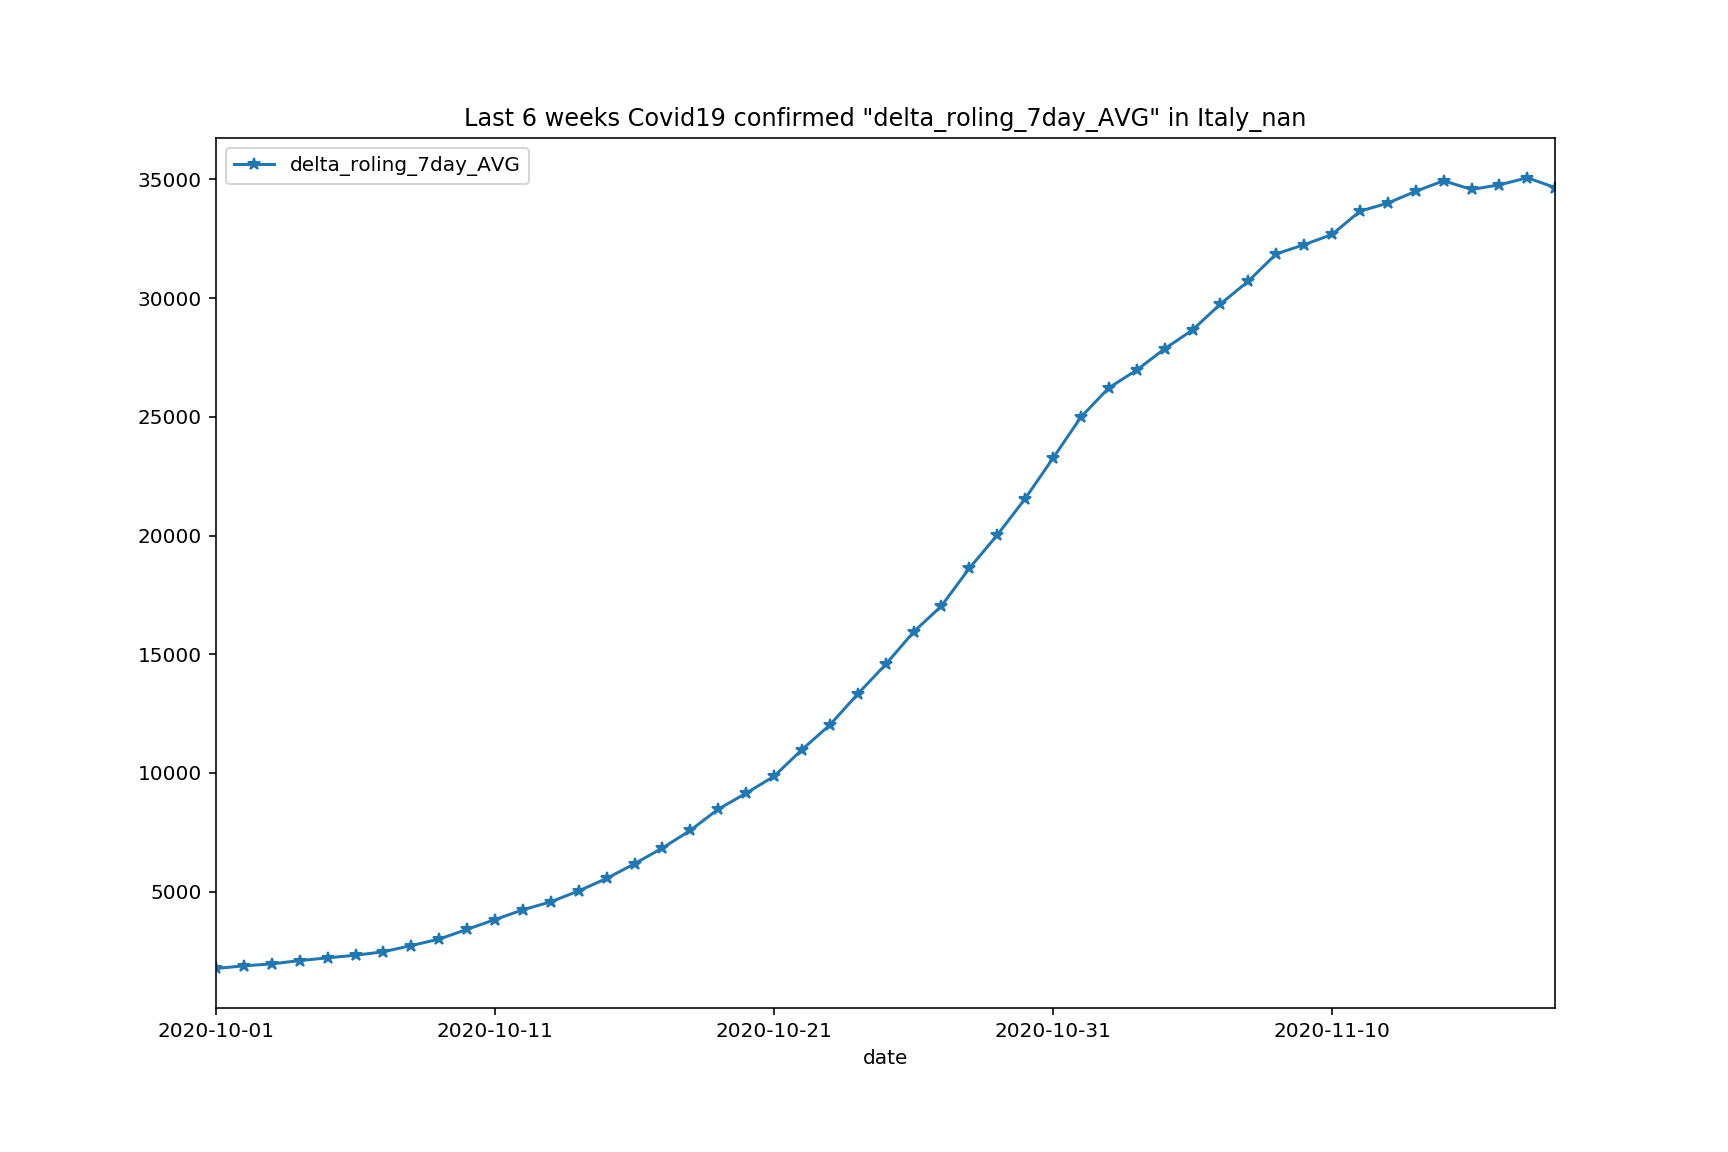

In [54]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


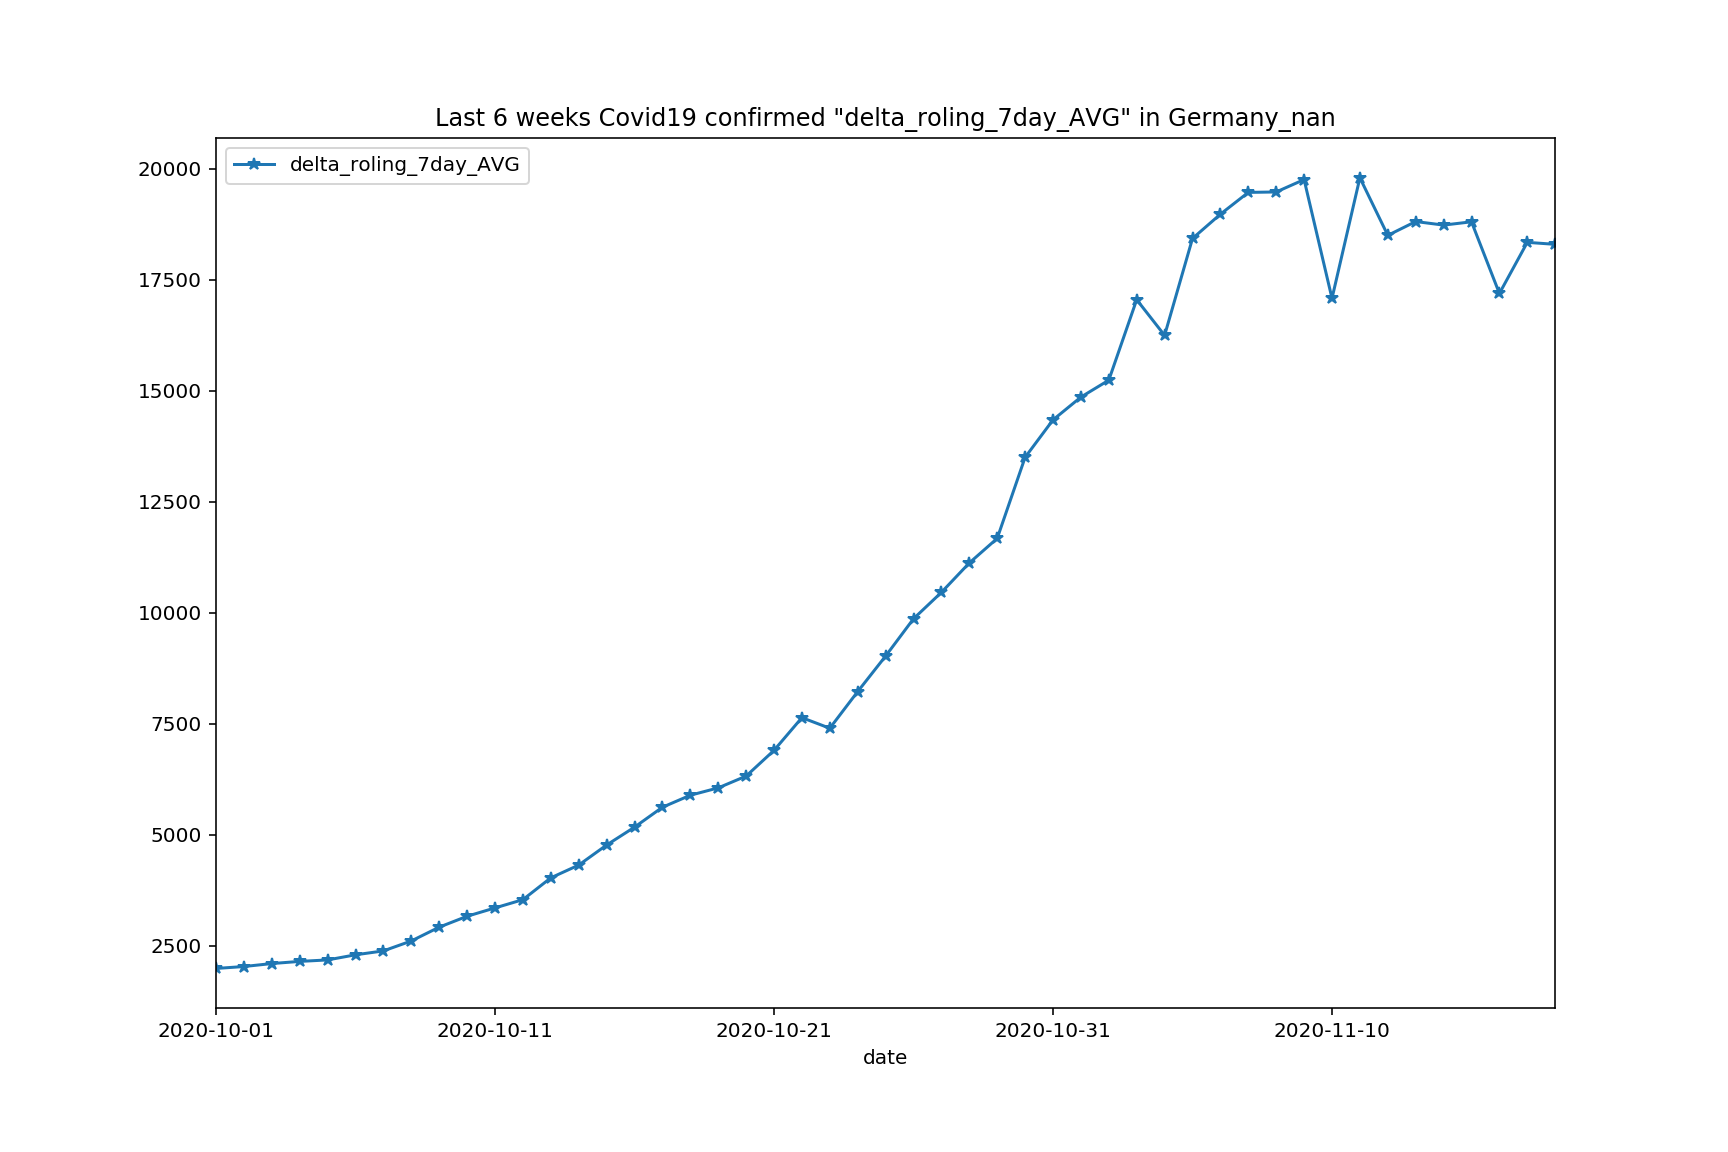

In [55]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


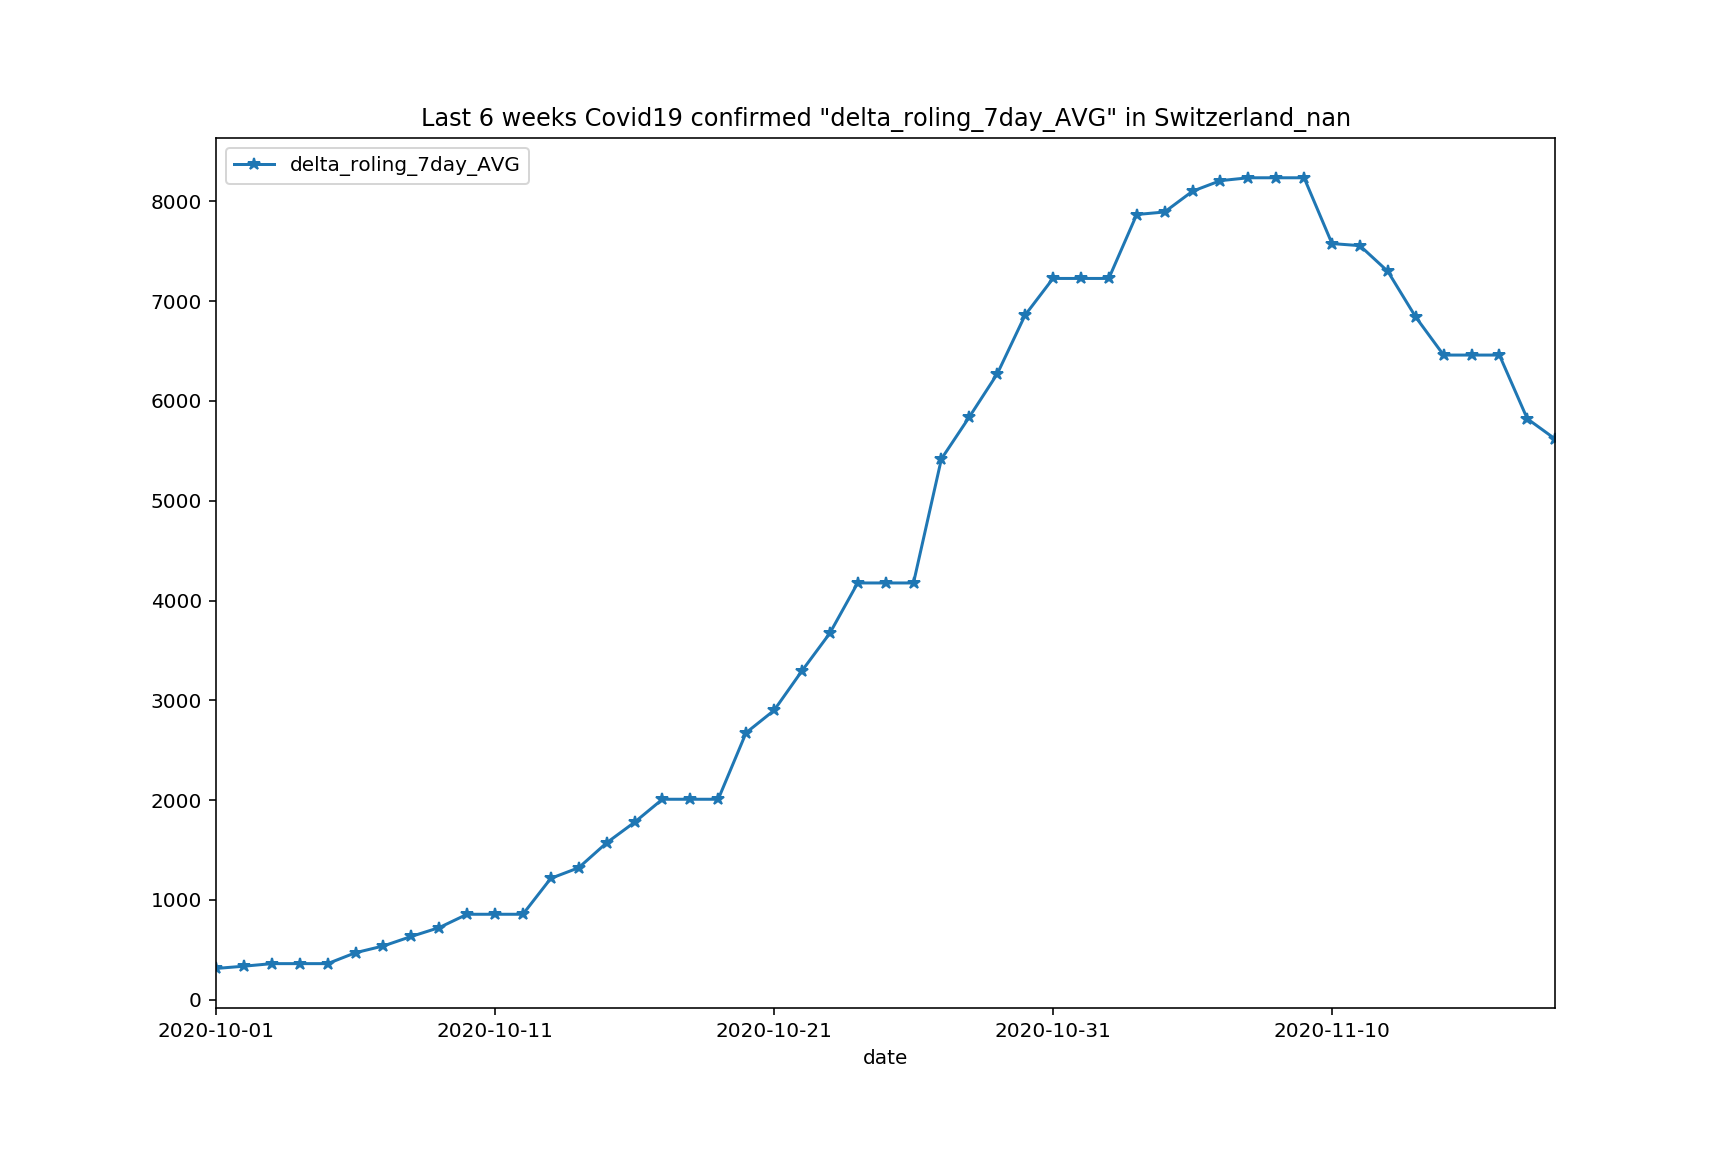

In [56]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


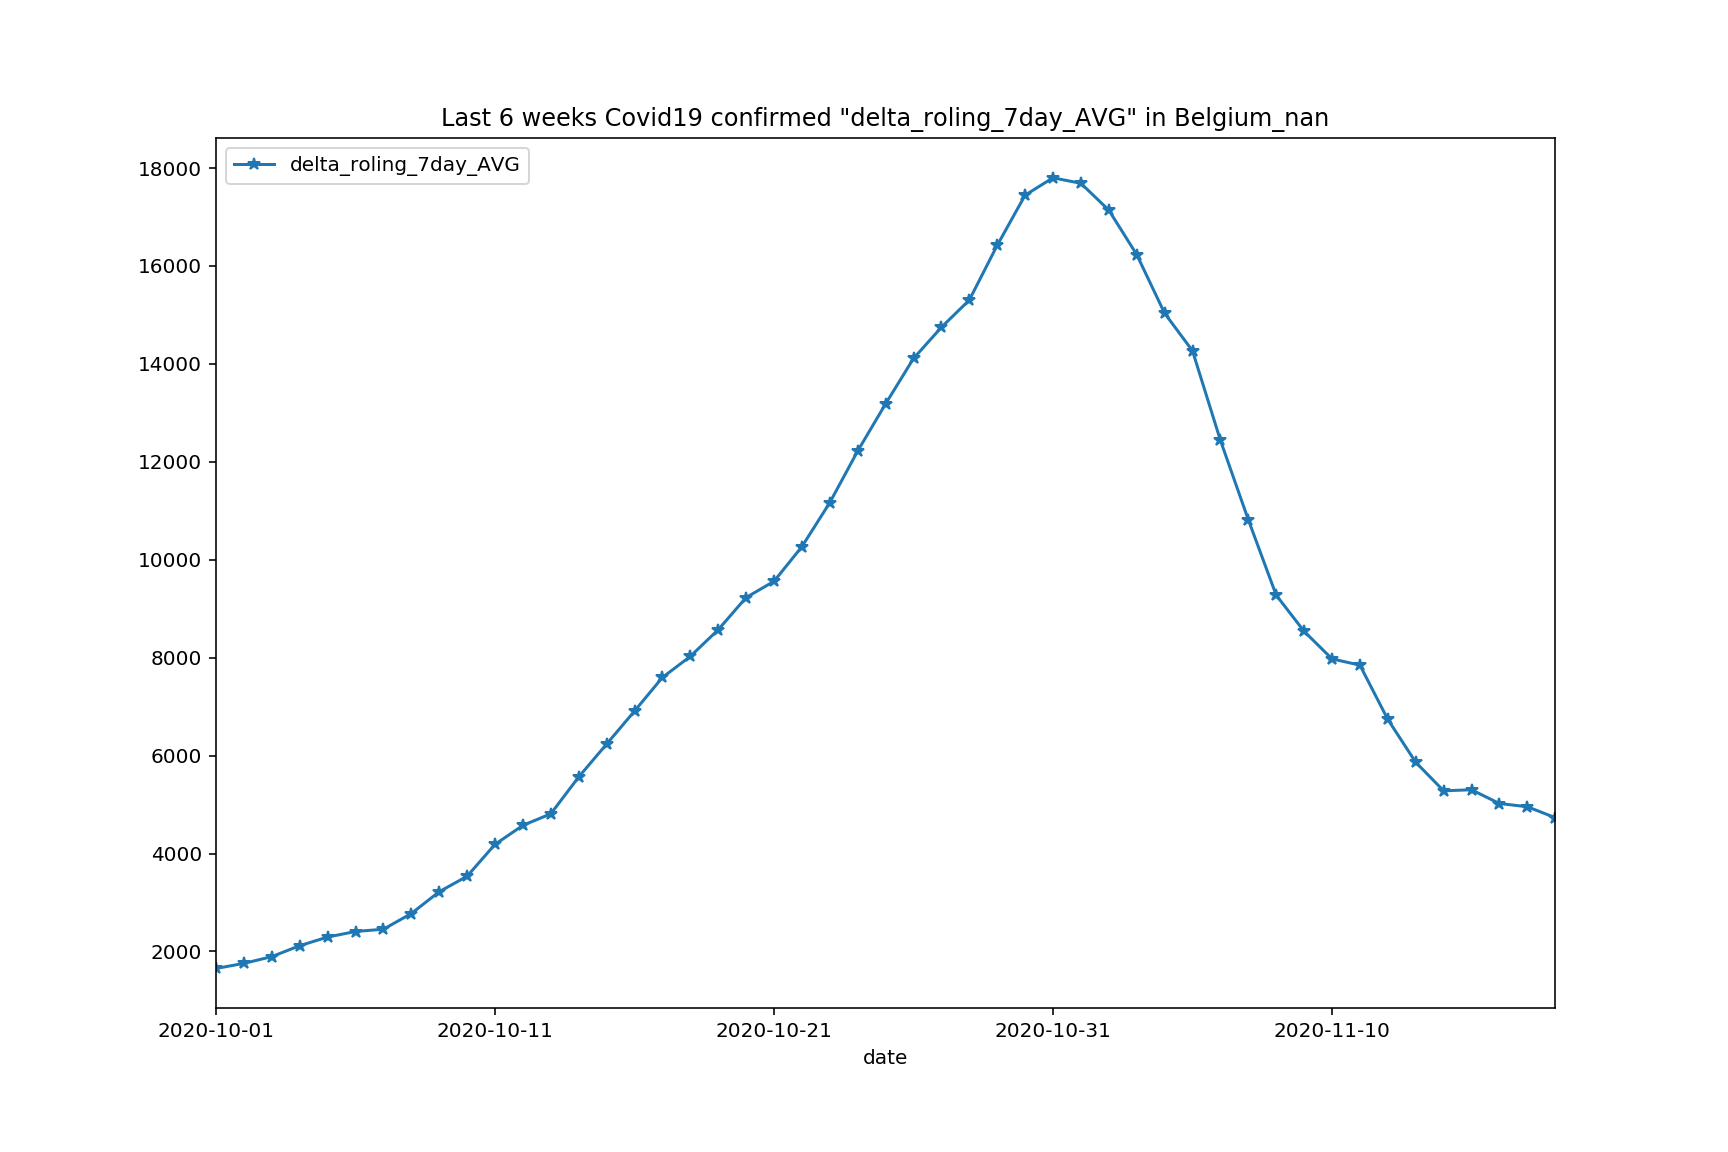

In [57]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


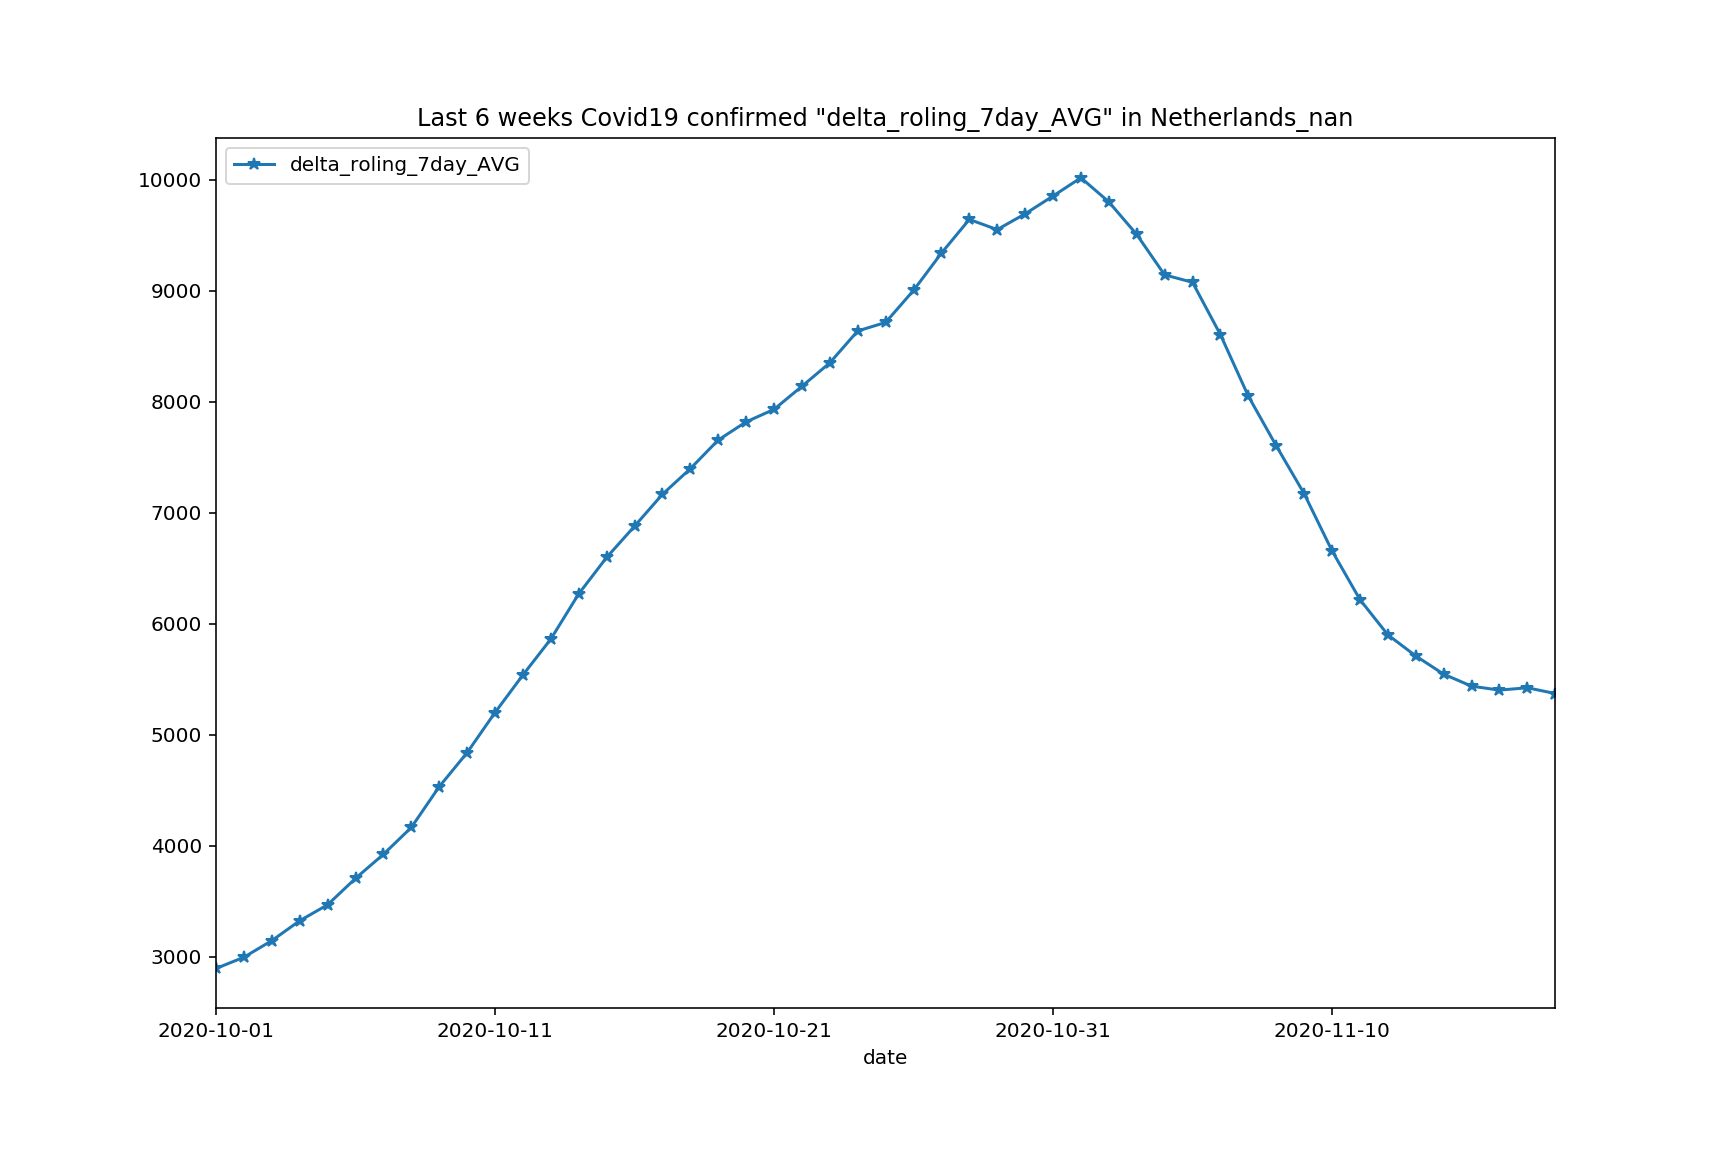

In [58]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


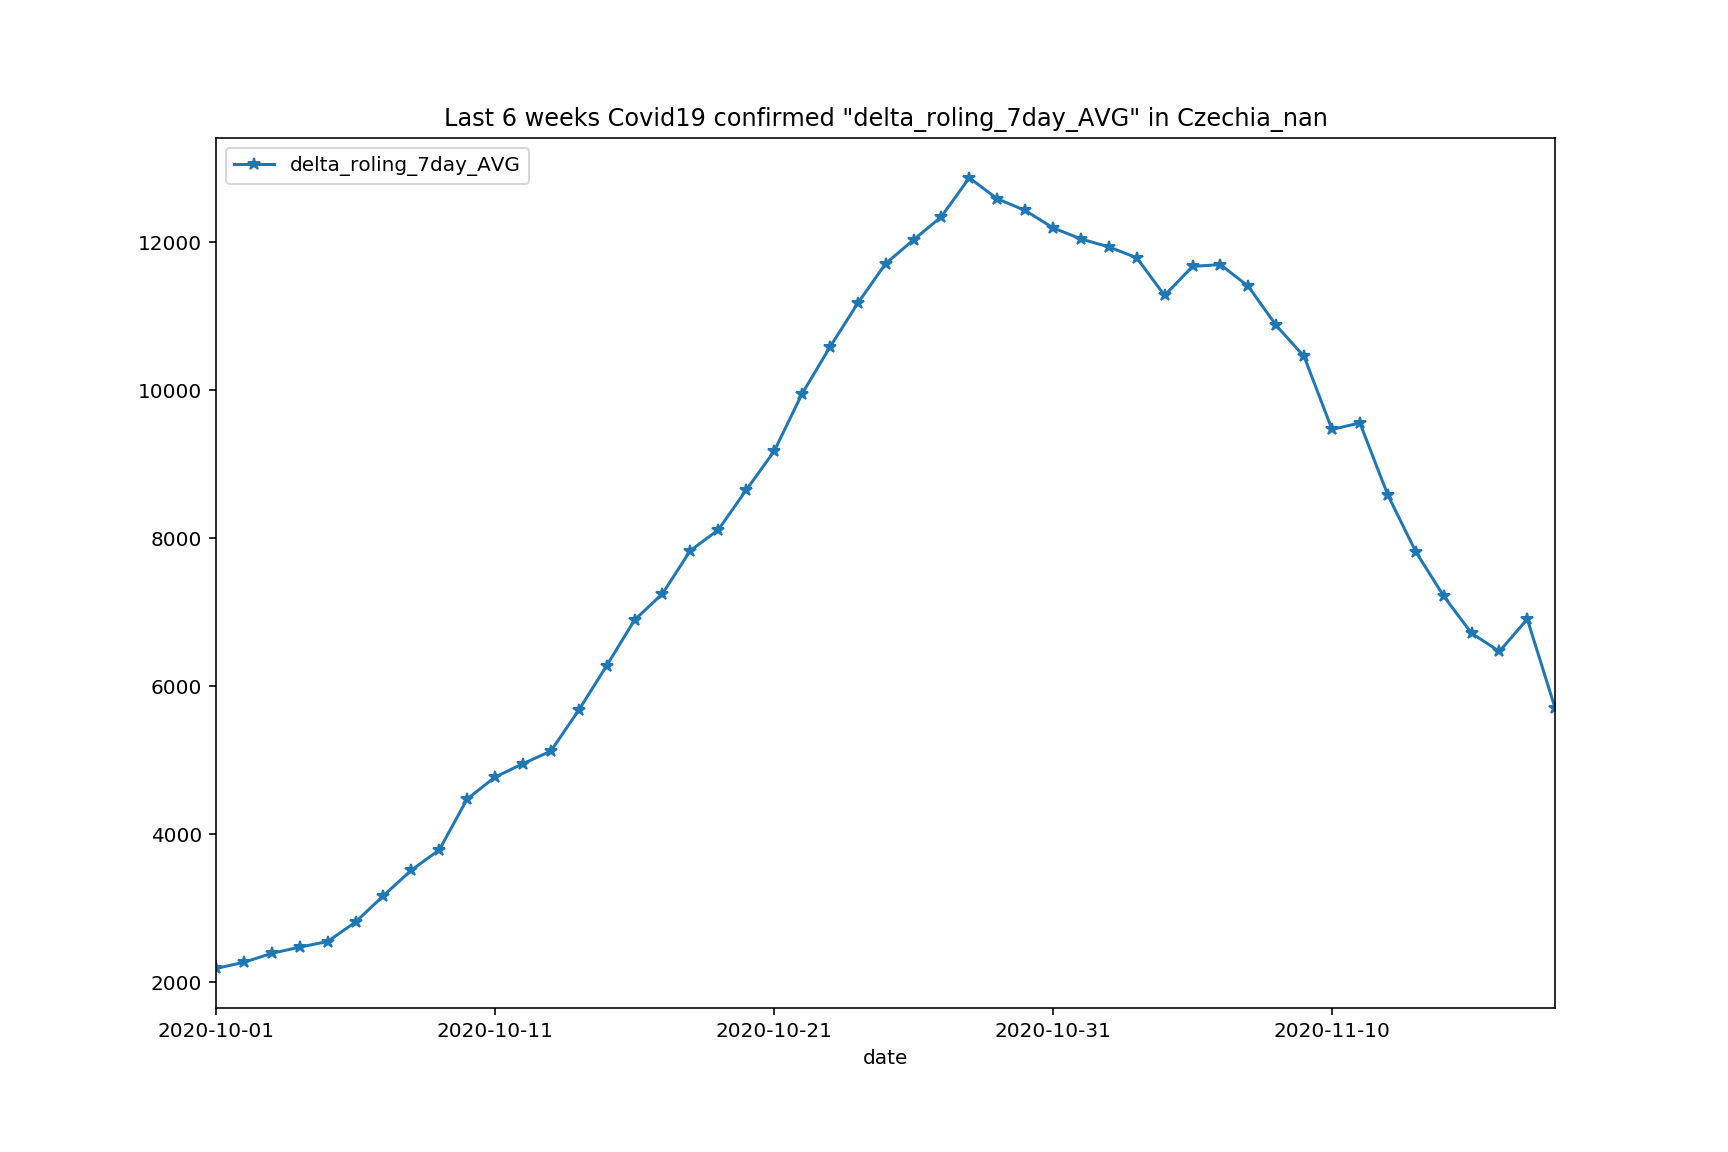

In [59]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


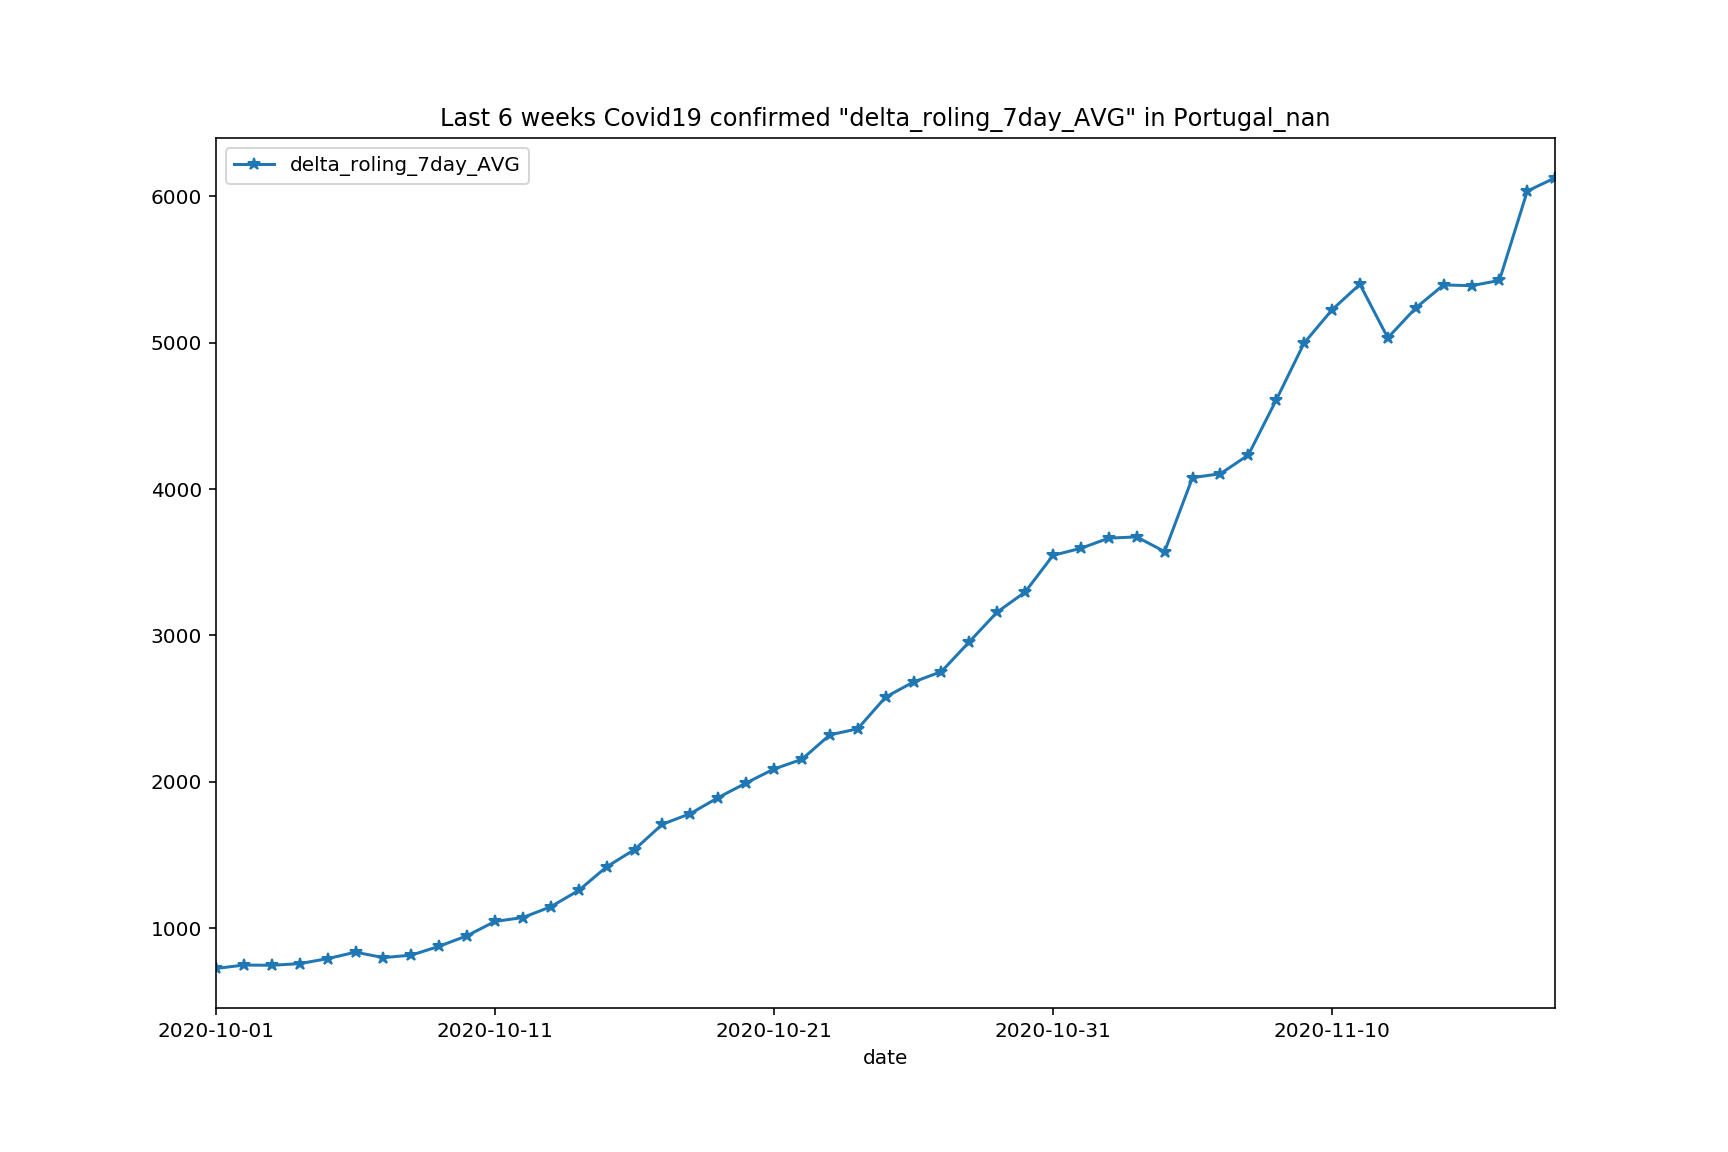

In [60]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [61]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [62]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
